# **Project Title:**  Classifying Potentially Hazardous Near-Earth Objects: A Machine Learning Approach to Planetary Defense

**Business Objectives:**

This project is about contributing to a safer planet. By accurately classifying PHAs, we can:

* **Enhance Planetary Defense:** Early identification of hazardous asteroids empowers authorities to take timely action, potentially preventing catastrophic events.
* **Optimize Resource Allocation:**  With vast amounts of NEO data available, this model helps prioritize observation and analysis efforts, ensuring we focus on the most significant threats.
* **Facilitate Specialized Team Focus:** By efficiently filtering and identifying high-risk asteroids, the model frees up specialized teams to concentrate on trajectory simulations and uncertainty assessments, improving the overall responsiveness of planetary defense mechanisms.


This project dives deep into the world of Near-Earth Objects (NEOs), with the goal of classifying which ones are potentially hazardous (PHAs) to Earth. My journey began with an in-depth exploration of NASA's WISE/NEOWISE mission data before later on moving on to the JPL Small-Body Database; visualizing the relationships between orbital characteristics like `h_mag` (absolute magnitude) and `moid_au` (minimum orbit intersection distance). I uncovered intriguing patterns, such as the link between an NEO's aphelion distance, orbital period, and inclination. This exploration deepened my understanding of orbital mechanics and highlighted the challenges in detecting dim, close-approach asteroids.

To tackle the classification task, I trained and evaluated various machine learning models, prioritizing those capable of handling non-linearity and the imbalanced nature of the data. LightGBM and Random Forest emerged as top performers, achieving near-perfect accuracy and recall in classifying potentially hazardous NEOs.

To further improve the result, I refined the models using hyperparameter tuning and tested them on a larger dataset from the JPL Small-Body Database. This rigorous evaluation ensured the models could generalize well to new, unseen NEOs.

To understand the models' inner workings, I employed SHAP analysis, which revealed the critical role of h_mag and moid_au in classifying PHA status. This analysis also highlighted the challenges posed by dim, close-approach asteroids, aligning with NASA's own observations about the difficulties in detecting these objects.

Finally, to make this powerful tool accessible, I deployed the model using Streamlit, creating an interactive web application for classifying NEO hazards. This app allows users to input NEO characteristics and receive instant classifation, contributing to broader awareness and understanding of potentially hazardous objects in space.

This project showcases my ability to:

*   Think critically and analytically, diving deep into the data to uncover meaningful insights.
*   Learn independently and solve problems creatively, tackling an unfamiliar domain with confidence.
*   Select and engineer relevant features, improving model performance through thoughtful data preparation.
*   Evaluate and iterate on my approach, refining the models based on feedback and performance analysis.
*   Handle imbalanced datasets effectively, ensuring the model prioritizes the accurate detection of hazardous NEOs.
*   Communicate technical findings clearly, translating complex concepts into accessible narratives.
*   Visualize data effectively, using plots and graphs to identify patterns and communicate results.
*   Build and deploy a machine learning application, demonstrating practical skills in model development and deployment.
*   Collaborate effectively by recognizing the value of domain expertise and actively seeking feedback to refine my approach.

This project has real-world impact, contributing to planetary defense efforts by providing a reliable tool for identifying potentially hazardous NEOs.

Moving forward, this project can be expanded by incorporating real-time NEO updates from NASA APIs, allowing the model to adapt and improve continuously. This would create a dynamic and self-improving system, further enhancing its value in planetary defense efforts. (While I work on this, I am happy to share this projects progress so far).

**Near-Earth Objects (NEOs) Definition:** NEOs are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood (source: https://cneos.jpl.nasa.gov/about/basics.html). The NEOWISE project, a space-based mission, provides an excellent example of this, having discovered 399 objects: 34 comets, 365 Near-Earth Asteroids (NEAs), and 64 of those classified as Potentially Hazardous Asteroids (PHAs) (source: https://cneos.jpl.nasa.gov/stats/wise.html). This distinction reinforces the idea that NEOs encompass both comets and asteroids.

## **NOTE:** I often referr to NEOs as "asteroids" for simplicity. I chose the term "asteroids" because it's more mentally visual and relatable for most readers.

## **Data Collection**

**Source of Data**

The data used for this project was obtained from NASA’s **Center for Near-Earth Object Studies (CNEOS)**, specifically from the **Wide-field Infrared Survey Explorer (WISE)** dataset, which tracks Near-Earth Objects (NEOs) and asteroids. The dataset is publicly available via NASA’s CNEOS website, which provides information on the orbits, sizes, and potential threats of asteroids to Earth. The dataset is highly reliable and widely used in astronomical research and planetary defense initiatives.

**Data Source Link:**
 [NASA CNEOS WISE Data](https://cneos.jpl.nasa.gov/stats/wise.html)

**Data Description:**

The dataset contains multiple attributes related to the physical and orbital characteristics of asteroids and NEOs. Key features include:
- **Designation:** Identifier name assigned to the asteroid.
- **Discovery Date (YYYY-MM-DD):** The date on which the asteroid was discovered, in YYYY-MM-DD format.
- **H (mag):** Absolute magnitude (brightness) of the asteroid.
- **MOID (au):** Minimum Orbit Intersection Distance between the asteroid’s orbit and Earth’s orbit, measured in astronomical units.
- **q (au):** Perihelion distance (closest distance between the asteroid and the Sun).
- **Q (au):** Aphelion distance (farthest distance between the asteroid and the Sun).
- **Period (yr):** Orbital period (the time it takes for the asteroid to complete one orbit around the Sun), measured in years.
- **i (deg):** Orbital inclination (the tilt of the asteroid’s orbit relative to Earth's orbit), measured in degrees.
- **PHA:** Binary classification label indicating whether the asteroid is potentially hazardous (Y) or not hazardous (N).
- **Orbit Class:** AClassification of the asteroid based on its orbital characteristics (e.g., Apollo, Amor, Aten).



**Size of the Data:**
Number of Rows: 398 asteroid observations
Number of Columns: 10 features, including both numerical and categorical data.

## **Section 1: Installing Required Libraries and Importing Required Modules**
In this section, the necessary libraries and modules for data analysis, preprocessing, and modeling is installed.

In [1]:
# Installing necessary packages for the environment
!pip install shap
!pip install xgboost
!pip install lightgbm

# Data Handling and Numerical Operations
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

# Standardization
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Model Persistence
import pickle

# Visualization for Analysis
from scipy.stats import skew

# Chi-Square and T-Test for Statistical Analysis
from scipy.stats import chi2_contingency, ttest_ind

# Model Evaluation and SHAP Analysis
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix
from sklearn.exceptions import NotFittedError
import shap

# XGBoost and LightGBM for Classification
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Mounting Google Drive and Loading Dataset**
(This project is done on Google Collab and the data is stored in Google Drive)

In [2]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/nasa_neos_classification.csv'

# Loading the dataset using pandas
import pandas as pd
data = pd.read_csv(file_path)

# Displaying the first few rows to verify the data loaded correctly
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Designation                  398 non-null    object 
 1   Discovery Date (YYYY-MM-DD)  398 non-null    object 
 2   H (mag)                      364 non-null    float64
 3   MOID (au)                    398 non-null    float64
 4   q (au)                       398 non-null    float64
 5   Q (au)                       396 non-null    float64
 6   period (yr)                  396 non-null    float64
 7   i (deg)                      398 non-null    float64
 8   PHA                          363 non-null    object 
 9   Orbit Class                  398 non-null    object 
dtypes: float64(6), object(4)
memory usage: 31.2+ KB


In [3]:
data.head()

,Designation,Discovery Date (YYYY-MM-DD),H (mag),MOID (au),q (au),Q (au),period (yr),i (deg),PHA,Orbit Class
0,(2024 FL4),2024-03-31,21.61,0.097,1.07,3.77,3.76,15.58,N,Amor
1,(2024 ET5),2024-03-14,20.68,0.238,1.16,4.23,4.42,15.23,N,Amor
2,(2024 EO2),2024-03-01,19.08,0.195,1.19,4.55,4.86,54.73,N,Amor
3,(2024 AP7),2024-01-15,19.79,0.224,0.59,2.91,2.31,24.54,N,Apollo
4,(2024 AF6),2024-01-13,20.67,0.132,0.43,1.02,0.62,15.05,N,Aten


# **Data Cleaning and Preprocessing**
Next goal is to: Clean the data by handling missing values, converting types, and renaming columns to follow best practices.


Form the above, a few things we notice and need to correct:
- naming convention of columns
- discovery Date type is wrong
- missing values in H (mag),  Q (au),  period (yr) and PHA

In [4]:

# Renaming columns for better consistency and readability.
data.rename(columns={
    'Designation': 'designation',
    'Discovery Date (YYYY-MM-DD)': 'discovery_date',
    'H (mag)': 'h_mag',
    'MOID (au)': 'moid_au',
    'q (au)': 'q_au',
    'Q (au)': 'Q_au',  # Retain uppercase to distinguish from 'q_au'
    'period (yr)': 'period_yr',
    'i (deg)': 'inclination_deg',  # Rename to clarify that it represents inclination
    'PHA': 'pha',
    'Orbit Class': 'orbit_class'
}, inplace=True)

print(data.head())

  designation discovery_date  h_mag  moid_au  q_au  Q_au  period_yr  \
0  (2024 FL4)     2024-03-31  21.61    0.097  1.07  3.77       3.76   
1  (2024 ET5)     2024-03-14  20.68    0.238  1.16  4.23       4.42   
2  (2024 EO2)     2024-03-01  19.08    0.195  1.19  4.55       4.86   
3  (2024 AP7)     2024-01-15  19.79    0.224  0.59  2.91       2.31   
4  (2024 AF6)     2024-01-13  20.67    0.132  0.43  1.02       0.62   

   inclination_deg pha orbit_class  
0            15.58   N        Amor  
1            15.23   N        Amor  
2            54.73   N        Amor  
3            24.54   N      Apollo  
4            15.05   N        Aten  


In [5]:
# Convert 'discovery_date' to datetime format.
data['discovery_date'] = pd.to_datetime(data['discovery_date'], format='%Y-%m-%d')
print(data.info(),'\n')

# Summary of missing values after cleaning.
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      398 non-null    object        
 1   discovery_date   398 non-null    datetime64[ns]
 2   h_mag            364 non-null    float64       
 3   moid_au          398 non-null    float64       
 4   q_au             398 non-null    float64       
 5   Q_au             396 non-null    float64       
 6   period_yr        396 non-null    float64       
 7   inclination_deg  398 non-null    float64       
 8   pha              363 non-null    object        
 9   orbit_class      398 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 31.2+ KB
None 

designation         0
discovery_date      0
h_mag              34
moid_au             0
q_au                0
Q_au                2
period_yr           2
inclination_deg     0
pha 

In [6]:
# Summary of missing values after cleaning.
print(data.isnull().sum())
data = data.dropna(subset=['pha'])
print(data.isnull().sum())
print(data.info())

designation         0
discovery_date      0
h_mag              34
moid_au             0
q_au                0
Q_au                2
period_yr           2
inclination_deg     0
pha                35
orbit_class         0
dtype: int64
designation        0
discovery_date     0
h_mag              0
moid_au            0
q_au               0
Q_au               0
period_yr          0
inclination_deg    0
pha                0
orbit_class        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 397
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      363 non-null    object        
 1   discovery_date   363 non-null    datetime64[ns]
 2   h_mag            363 non-null    float64       
 3   moid_au          363 non-null    float64       
 4   q_au             363 non-null    float64       
 5   Q_au             363 non-null    float64       
 6   period_yr      

### First: Droping rows with missing values in the 'pha' column.
- The 'pha' column is integral to the project as it indicates whether an asteroid is potentially hazardous. It's the column we're learning from.
- Since our goal is to classify hazardous asteroids, having missing values in this column would lead to incorrect or incomplete analysis.
- Dropping rows with missing 'pha' ensures that the dataset is reliable for training machine learning models.

In [7]:
data = data.dropna(subset=['pha'])
print(data.isnull().sum())

# After dropping rows with missing values in the 'pha' column, all other missing values were also removed, resulting in a complete dataset with no null values.
# This step ensures that we have a clean dataset without gaps, which helps for consistent model training and analysis.

designation        0
discovery_date     0
h_mag              0
moid_au            0
q_au               0
Q_au               0
period_yr          0
inclination_deg    0
pha                0
orbit_class        0
dtype: int64


In [8]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
discovery_date,363,2015-01-16 13:25:17.355371776,2006-02-25 00:00:00,2010-06-14 12:00:00,2014-12-24 00:00:00,2018-04-19 00:00:00,2024-03-31 00:00:00,NaN
h_mag,363.0,21.279725,15.4,19.485,20.36,21.33,99.99,8.452632
moid_au,363.0,0.149514,0.0006,0.047,0.13,0.225,0.708,0.125424
q_au,363.0,0.907245,0.12,0.77,0.96,1.07,1.53,0.244591
Q_au,363.0,4.290882,1.0,2.245,3.49,4.37,305.16,16.019573
period_yr,363.0,8.724518,0.53,1.92,3.37,4.42,1896.28,99.484412
inclination_deg,363.0,22.521322,0.5,13.26,20.29,28.64,145.5,14.08684


# **Data Preprocessing + Feature Engineering**

## From the above data description, a few observations and corrections are needed:
- The h_mag feature ranges from 15.4 to 99.99, suggesting extreme values that may skew the distribution.
- The Q_au feature ranges from 1.0 to 305.16, indicating significant outliers in aphelion distance, as the difference between the 75th percentile and the max is extreme.
- The period_yr feature ranges from 0.53 to 1896.28, indicating a wide spread in orbital periods, which could lead to skewed data.
- The moid_au feature ranges from 0.0006 to 0.708, showing a large spread in minimum orbit intersection distance, leading to potential skewness.
- The inclination_deg feature ranges from 0.5 to 145.5, which may seem wide, but given that inclination can naturally range from 0 to 360 degrees, this seems reasonable.
- These observations are from a novice standpoint as I work on NASA-related data with no domain knowledge, aiming to learn through exploration and analysis.

## Suggested Solution
- Applying Logarithmic Transformation: I learned that log transformation is a common technique to handle skewed data, as it helps to normalize the distribution and stabilize variance, making it easier for statistical models to interpret the data. In this project, as will be seen further down, Log transformation doesn't remove the outliers but reduces their impact, ensuring that rare.outliers observations don't disproportionately influence the analysis/modelling.

# **Feature Engineering**
**Applying Logarithmic Transformation**

In [9]:
# To avoid errors with log transformation (e.g., log(0)), I added a small constant (1e-6) to all values. This looked like best practices from research.

data['h_mag_log'] = np.log(data['h_mag'] + 1e-6)
data['moid_au_log'] = np.log(data['moid_au'] + 1e-6)
data['Q_au_log'] = np.log(data['Q_au'] + 1e-6)
data['period_yr_log'] = np.log(data['period_yr'] + 1e-6)

# Display updated dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 397
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      363 non-null    object        
 1   discovery_date   363 non-null    datetime64[ns]
 2   h_mag            363 non-null    float64       
 3   moid_au          363 non-null    float64       
 4   q_au             363 non-null    float64       
 5   Q_au             363 non-null    float64       
 6   period_yr        363 non-null    float64       
 7   inclination_deg  363 non-null    float64       
 8   pha              363 non-null    object        
 9   orbit_class      363 non-null    object        
 10  h_mag_log        363 non-null    float64       
 11  moid_au_log      363 non-null    float64       
 12  Q_au_log         363 non-null    float64       
 13  period_yr_log    363 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
me

**Ensuring column/varibale compatibility with machine learning algorithms**

In [10]:
# Convert 'PHA' values from 'Y' and 'N' to 1 (hazardous) and 0 (non-hazardous)
data['pha'] = data['pha'].replace({'Y': 1, 'N': 0})
print(data['pha'].value_counts())

# Extract 'Discovery Year' from 'discovery_date' for trend analysis later on
data['discovery_year'] = pd.to_datetime(data['discovery_date']).dt.year

pha
0    299
1     64
Name: count, dtype: int64


<ipython-input-10-55b521ac0d91>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pha'] = data['pha'].replace({'Y': 1, 'N': 0})


In [11]:
data.tail()

,designation,discovery_date,h_mag,moid_au,q_au,Q_au,period_yr,inclination_deg,pha,orbit_class,h_mag_log,moid_au_log,Q_au_log,period_yr_log,discovery_year
393,(2010 BV132),2010-01-16,21.39,0.023,1.01,1.45,1.36,17.28,1,Apollo,3.062924,-3.772218,0.371564,0.307485,2010
394,(2010 AU118),2010-01-13,99.90,0.355,1.34,3.35,3.59,42.73,0,Mars-crossing Asteroid,4.604170,-1.035635,1.208961,1.278152,2010
395,(2010 AG79),2010-01-13,20.04,0.232,1.21,4.58,4.93,33.04,0,Amor,2.997730,-1.461014,1.521699,1.595339,2010
396,614599 (2010 AB78),2010-01-12,18.31,0.207,1.02,3.49,3.39,33.25,0,Amor,2.907447,-1.575032,1.249902,1.220830,2010
397,606908 (2019 KB2),2006-02-25,18.32,0.440,1.17,4.10,4.28,24.96,0,Amor,2.907993,-0.820978,1.410987,1.453953,2006


# **Exploratory Data Analysis (EDA)**

## Univariate (Space-Themed for Presentation)

### **discovery_year**

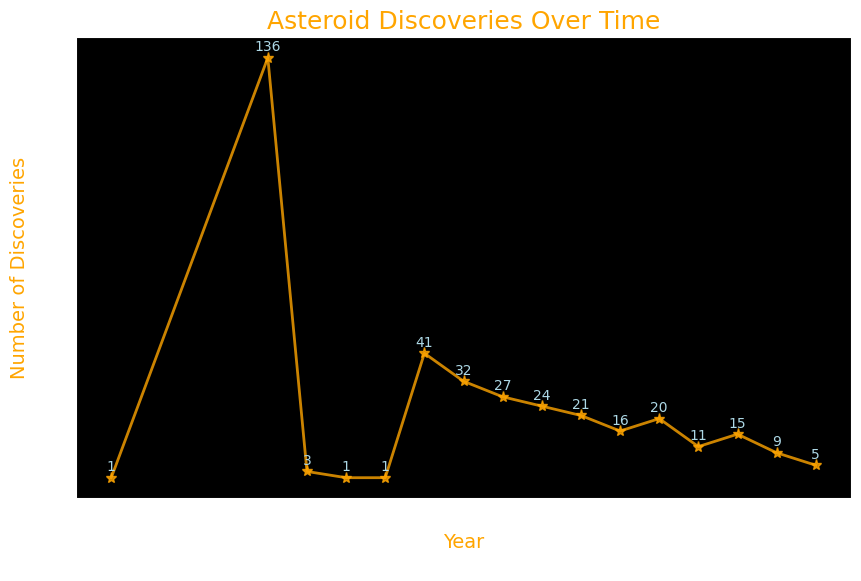

In [12]:
# Calculate the number of asteroid discoveries per year
discovery_counts = data['discovery_year'].value_counts().sort_index()

# Create a line plot for asteroid discoveries over time
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Plotting the number of discoveries over time
plt.plot(discovery_counts.index, discovery_counts.values, linestyle='-', marker='*', color='orange', markersize=8, linewidth=2, alpha=0.8)

# Customizing plot appearance
plt.title('Asteroid Discoveries Over Time', fontsize=18, color='orange')
plt.xlabel('Year', fontsize=14, color='orange')
plt.ylabel('Number of Discoveries', fontsize=14, color='orange')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Highlighting x and y axes
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)

# Adding annotations for each data point
for year, count in zip(discovery_counts.index, discovery_counts.values):
    plt.annotate(str(count), (year, count), textcoords="offset points", xytext=(0,5), ha='center', color='lightblue', fontsize=10)

# Adding source text at the bottom
plt.text(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center', transform=plt.gca().transAxes)

# Removing grid lines
plt.grid(visible=False)

# Display the plot
plt.show()


**discovery_year Takeaways**

After noticing a considerable spike in discoveries around 2010, I was prompted to investigate why. Some questions that came to mind were:

- Could new advancements in technology have made detection more feasible?
- Did changes in the classification parameters of what qualifies as an NEO affect discovery counts?
- Were there potential misidentifications due to a wider range of what was considered NEOs?
- Could improvements in accuracy and technology post-2010 have led to fewer but more confident discoveries after 2015?

In [13]:
# Looking into the data in more detail:

# Counting the number of asteroids discovered in each unique year
asteroid_discoveries_per_year = data['discovery_year'].value_counts().sort_index()

# Display the number of asteroids discovered per year
print(asteroid_discoveries_per_year)


discovery_year
2006      1
2010    136
2011      3
2012      1
2013      1
2014     41
2015     32
2016     27
2017     24
2018     21
2019     16
2020     20
2021     11
2022     15
2023      9
2024      5
Name: count, dtype: int64


**Explaining the Variation of NEO Discoveries in the Time Series**

Upon further research to answer the questions, the following events explain the variation in NEO discoveries:

- **2006-2010 (1 to 136 discoveries)**: The WISE mission was launched in December 2009, and its primary operations began in 2010. As a result, 2010 saw a significant spike in discoveries with 136 NEOs. This was largely due to WISE's ability to scan large portions of the sky using infrared, which helped detect many NEOs that optical telescopes might miss.

- **2011 (3 discoveries)**: In February 2011, WISE was put into hibernation after completing its initial mission. The number of NEO discoveries dropped significantly because the mission's primary phase had ended.

- **2013 (1 discovery)**: WISE was reactivated in late 2013 as NEOWISE, with a specific focus on discovering and monitoring NEOs. The low number of discoveries in 2013 was due to the spacecraft only coming back online late in the year.

- **2014-2020 (41 to 20 discoveries)**: As NEOWISE became fully operational in 2014, the number of NEO discoveries increased once again, peaking at 41 discoveries that year. However, as NEOWISE aged and its orbit decayed, the number of discoveries began to gradually decrease, from 41 in 2014 to 20 in 2020.

- **2021-2024 (11 to 5 discoveries)**: By 2021, NEOWISE’s orbit had decayed significantly due to increased solar activity, which limited its ability to make observations. This resulted in fewer discoveries during the last few years of its operation. NEOWISE is expected to burn up in Earth's atmosphere by the end of 2024.

Read more about the mission [here](https://www.planetary.org/space-missions/neowise#:~:text=Highlights,how%20to%20stop%20dangerous%20asteroids.).



### **h_mag**

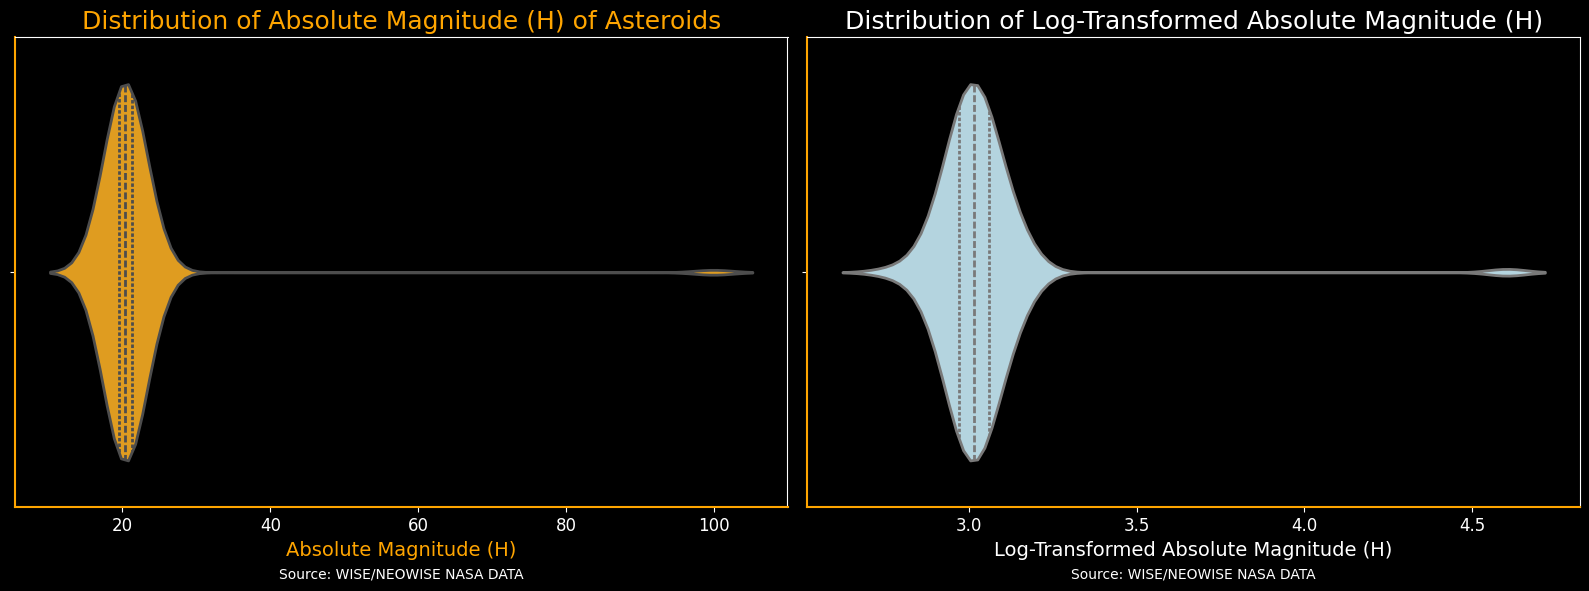

In [14]:
# Creating two side-by-side violin plots for h_mag and h_mag_log
plt.figure(figsize=(16, 6))
plt.style.use('dark_background')

# Plot for h_mag
plt.subplot(1, 2, 1)
sns.violinplot(
    x=data['h_mag'],
    color='orange',
    inner='quartile',
    linewidth=2
)

# Customizing labels and title with color for consistency with the space theme
plt.xlabel('Absolute Magnitude (H)', fontsize=14, color='orange')
plt.title('Distribution of Absolute Magnitude (H) of Asteroids', fontsize=18, color='orange')

# x and y axes for h_mag
ax = plt.gca()
ax.spines['bottom'].set_color('orange')
ax.spines['left'].set_color('orange')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(visible=False)

# Adding source text at the bottom
plt.text(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center', transform=plt.gca().transAxes)

# Plot for h_mag_log for side-by-side comparison
plt.subplot(1, 2, 2)
sns.violinplot(
    x=data['h_mag_log'],
    color='lightblue',
    inner='quartile',
    linewidth=2
)

# Customizing labels and title with color for consistency with the space theme
plt.xlabel('Log-Transformed Absolute Magnitude (H)', fontsize=14, color='white')
plt.title('Distribution of Log-Transformed Absolute Magnitude (H)', fontsize=18, color='white')

# x and y axes for h_mag_log
ax = plt.gca()
ax.spines['bottom'].set_color('orange')
ax.spines['left'].set_color('orange')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(visible=False)

# Adding source text at the bottom
plt.text(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()

# Show the plots
plt.show()


**Takeaways from the h_mag Graphs:**

1. **Majority of Asteroids Have Moderate Brightness**:
   - Most NEOs have an absolute magnitude (H) between 15 and 25, meaning they are neither too bright nor too dim. Research on Nasa's articles indicates that lower absolute magnitude values correlate with larger and brighter objects, while higher values correspond with smaller, dimmer objects. This brightness range observed seem typical for near-Earth objects (NEOs) which is what this datas focus is.
     - Supporting Source: https://cneos.jpl.nasa.gov/tools/ast_size_est.html

2. **Few Extremely Dim Asteroids**:
   - The long right tail in the original distribution indicates that a small fraction of NEOs has an absolute magnitude greater than 30 (suggesting small size or low brightness). More curiosity led me to finding that these dimmer objects  are therefore harder to detect.
- Supporting Source: https://www.jpl.nasa.gov/edu/resources/teachable-moment/how-nasa-studies-and-tracks-asteroids-near-and-far/

# **Critique from a Domain Knowledge Enthusiast & My Response**

**During a review of my project, a domain knowledge enthusiast remarked, "Magnitude is already a logarithmic scale. I don't think they've found any asteroids with H≥34 yet. I would throw out H≥50."**

In [15]:
filtered_data = data[data['h_mag'] > 35]
print(filtered_data)

      designation discovery_date  h_mag  moid_au  q_au  Q_au  period_yr  \
285  (2010 MY112)     2010-06-23  99.99    0.146  0.81  1.33       1.11   
296   (2010 LB67)     2010-06-13  99.90    0.682  1.53  4.01       4.61   
307   (2010 LF64)     2010-06-03  99.90    0.406  1.35  6.17       7.29   
394  (2010 AU118)     2010-01-13  99.90    0.355  1.34  3.35       3.59   

     inclination_deg  pha               orbit_class  h_mag_log  moid_au_log  \
285            38.58    0                    Apollo    4.60507    -1.924142   
296            20.11    0    Mars-crossing Asteroid    4.60417    -0.382724   
307            29.14    0  Outer Main-belt Asteroid    4.60417    -0.901400   
394            42.73    0    Mars-crossing Asteroid    4.60417    -1.035635   

     Q_au_log  period_yr_log  discovery_year  
285  0.285180       0.104361            2010  
296  1.388791       1.528228            2010  
307  1.819699       1.986504            2010  
394  1.208961       1.278152            

In [16]:
# Drop rows where h_mag > 35
data = data[data['h_mag'] <= 35]

data.describe()

,discovery_date,h_mag,moid_au,q_au,Q_au,period_yr,inclination_deg,pha,h_mag_log,moid_au_log,Q_au_log,period_yr_log,discovery_year
count,359,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000
mean,2015-02-04 16:22:43.788300800,20.403482,0.146754,0.903343,4.297298,8.775487,22.408579,0.178273,3.012843,-2.383610,1.126737e+00,1.057664,2014.618384
min,2006-02-25 00:00:00,15.400000,0.000600,0.120000,1.000000,0.530000,0.500000,0.000000,2.734368,-7.416916,9.999995e-07,-0.634876,2006.000000
25%,2010-06-22 00:00:00,19.480000,0.046500,0.770000,2.245000,1.920000,13.120000,0.000000,2.969388,-3.068339,8.086836e-01,0.652326,2010.000000
50%,2015-01-03 00:00:00,20.340000,0.127000,0.960000,3.490000,3.360000,20.240000,0.000000,3.012589,-2.063560,1.249902e+00,1.211941,2015.000000
75%,2018-05-12 00:00:00,21.285000,0.224000,1.065000,4.370000,4.420000,28.420000,0.000000,3.058002,-1.496105,1.474763e+00,1.486140,2018.000000
max,2024-03-31 00:00:00,24.990000,0.708000,1.300000,305.160000,1896.280000,145.500000,1.000000,3.218476,-0.345310,5.720836e+00,7.547649,2024.000000
std,NaN,1.540350,0.121679,0.241449,16.107668,100.037192,14.094105,0.383277,0.075976,1.134601,5.588294e-01,0.703196,4.297173


Text(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA')

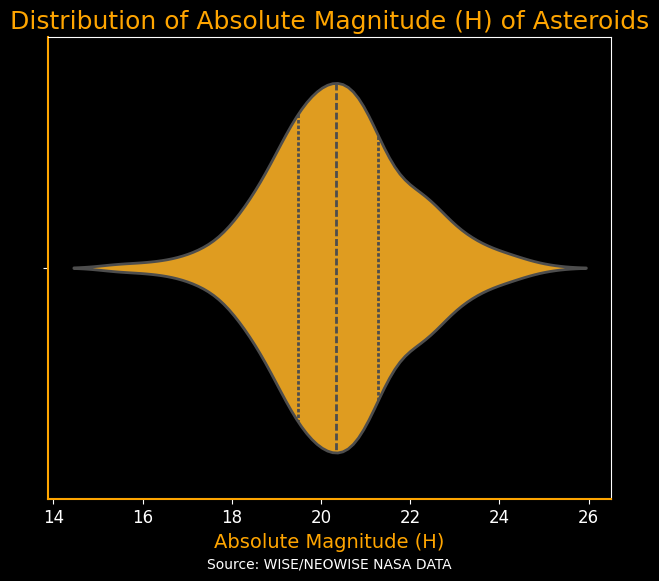

In [17]:
# Creating an updated violin plots for h_mag
plt.figure(figsize=(16, 6))
plt.style.use('dark_background')

# Plot for h_mag
plt.subplot(1, 2, 1)
sns.violinplot(
    x=data['h_mag'],
    color='orange',
    inner='quartile',
    linewidth=2
)

# Customizing labels and title with color for consistency with the space theme
plt.xlabel('Absolute Magnitude (H)', fontsize=14, color='orange')
plt.title('Distribution of Absolute Magnitude (H) of Asteroids', fontsize=18, color='orange')

# x and y axes for h_mag
ax = plt.gca()
ax.spines['bottom'].set_color('orange')
ax.spines['left'].set_color('orange')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
plt.grid(visible=False)

# Adding source text at the bottom
plt.text(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center', transform=plt.gca().transAxes)

**My analysis to the critique**

This insightful comment made me to double-check the dataset, specifically examining the absolute magnitude (H) values. I did find that while there were no recorded instances of H ≥ 34, a number of entries had H values of 99.0 or 99.99 (Also visually reflected in the initial skewed h_mag plot). Given the context offered by the expert on the logarithmic nature of h_mag and the physical implications, such high values seemed improbable. An H magnitude above 50, let alone 99.9, would suggest an exceedingly faint object, likely beyond the detection capabilities of NASA's technology.

This discrepancy and the expert ntoes led me to suspect that these extreme H values were not actual measurements but either rather placeholders for unknown values (common practices to signify missing or unreliable data) or data entry error.  

This experience help reinforce the importance of critically evaluating data, considering domain-specific knowledge, and recognizing issues with data collection in any research.

Note: The rest of the columns with their outlier seem to hold up in practicality and astrophysics possibility.

### **moid_au & moid_au_log**

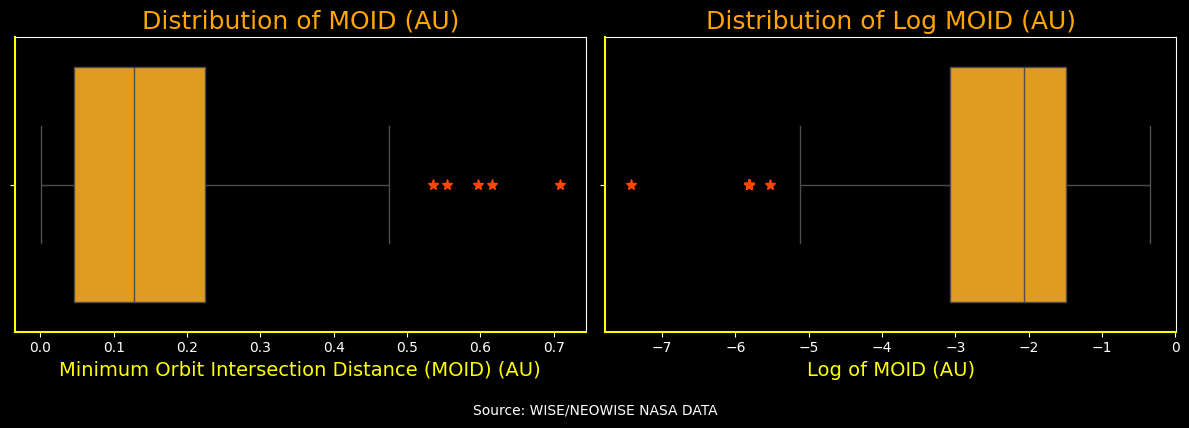

In [18]:
# Creating two side-by-side box plots to compare the distribution before and after log transformation

# Setting up the figure for two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.style.use('dark_background')

# Original MOID (AU) Box Plot
sns.boxplot(
    ax=axes[0],
    x=data['moid_au'],
    color='orange',
    flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=8, linewidth=2)
)
axes[0].set_xlabel('Minimum Orbit Intersection Distance (MOID) (AU)', fontsize=14, color='yellow')
axes[0].set_title('Distribution of MOID (AU)', fontsize=18, color='orange')

# Emphasizing the axes with color to maintain a theme
axes[0].spines['bottom'].set_color('yellow')
axes[0].spines['left'].set_color('yellow')
axes[0].spines['bottom'].set_linewidth(1.5)
axes[0].spines['left'].set_linewidth(1.5)
axes[0].tick_params(axis='x', colors='white')
axes[0].tick_params(axis='y', colors='white')
axes[0].grid(visible=False)

# Log-transformed MOID (AU) Box Plot
sns.boxplot(
    ax=axes[1],
    x=data['moid_au_log'],
    color='orange',
    flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=8, linewidth=2)
)
axes[1].set_xlabel('Log of MOID (AU)', fontsize=14, color='yellow')
axes[1].set_title('Distribution of Log MOID (AU)', fontsize=18, color='orange')

# Emphasizing the axes with color to maintain a theme
axes[1].spines['bottom'].set_color('yellow')
axes[1].spines['left'].set_color('yellow')
axes[1].spines['bottom'].set_linewidth(1.5)
axes[1].spines['left'].set_linewidth(1.5)
axes[1].tick_params(axis='x', colors='white')
axes[1].tick_params(axis='y', colors='white')
axes[1].grid(visible=False)

# Adding source text at the bottom
fig.text(0.5, -0.05, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

plt.tight_layout()
plt.show()

**Takeaways from the moid(au) Graphs:**
- The Minimum Orbit Intersection Distance measures how close an NEOs orbit comes to Earth's orbit. A smaller MOID, i.e closer to earth's orbit could indicate a higher risk and viceversa for higher MOID values.

- Wide Range and Outliers: In the original distribution, most MOID values are below 0.2 AU, indicating a high risk of close approach, but a few extreme outliers exceed 0.5 AU. These outliers represent asteroids farther away from Earth and can distort analysis if untreated.

- Why the Outliers Are Now on the Left: After log transformation, the outliers switched to the left. This represent the log of small extremly small values while the log function has help compress larger values to stabilize variance and reduce skewness.

### **q(au)**

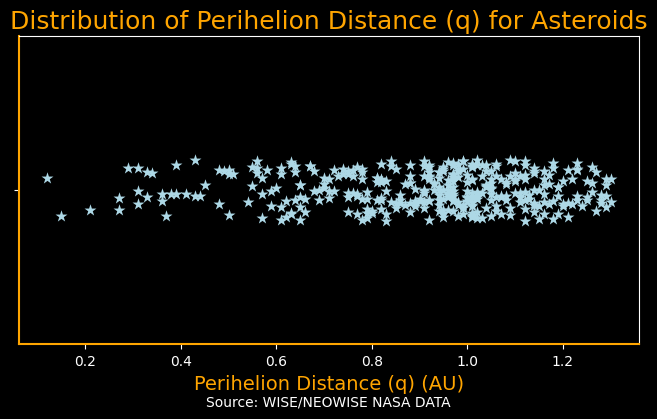

In [19]:
# Creating a strip plot for the Perihelion Distance (q)
plt.figure(figsize=(8, 4))
plt.style.use('dark_background')

# Creating the strip plot for q (au)
sns.stripplot(
    x=data['q_au'],
    color='lightblue',
    marker='*',
    size=9
)

# Adding axis labels and a title with consistent space theme
plt.xlabel('Perihelion Distance (q) (AU)', fontsize=14, color='orange')
plt.title('Distribution of Perihelion Distance (q) for Asteroids', fontsize=18, color='orange')

# Customizing x and y axis styling to match space theme
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(visible=False)

# Adding source text
plt.text(0.5, -0.2, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center', transform=plt.gca().transAxes)

# Display the plot
plt.show()


**Takeaways from the q(au) Graphs:**
- Perihelion Distance (q) is defined as the closest point an asteroid comes to the Sun during its orbit, measured in Astronomical Units (AU). From research, to provide context, 1 AU is equivalent to the distance between the Earth and the Sun.

- The data shows a **concentration of asteroids with perihelion distances between 0.5 and 1.3 AU**. This means many of these asteroids approach the Sun to distances ranging from less than half the Earth-Sun distance to just beyond Earth's orbit. This means that a significant number of NEOs are quite close to Earth’s orbit.

### **Q_au & Q_au_log**

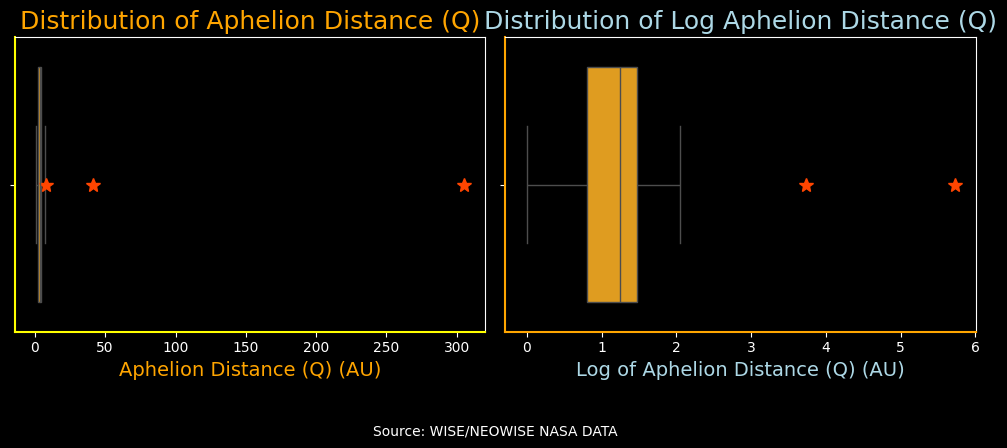

In [20]:
# Setting up a figure with 1 row and 2 columns for side-by-side comparison
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')

# Creating the first subplot for Q (au)
plt.subplot(1, 2, 1)
sns.boxplot(
    x=data['Q_au'],
    color='orange',
    flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=10, linewidth=2)
)

plt.xlabel('Aphelion Distance (Q) (AU)', fontsize=14, color='orange')
plt.title('Distribution of Aphelion Distance (Q)', fontsize=18, color='orange')

# Highlighting the axes without a grid for better visualization
plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(visible=False)

# Creating the second subplot for Q (au) log
plt.subplot(1, 2, 2)
sns.boxplot(
    x=data['Q_au_log'],
    color='orange',
    flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=10, linewidth=2)
)

plt.xlabel('Log of Aphelion Distance (Q) (AU)', fontsize=14, color='lightblue')
plt.title('Distribution of Log Aphelion Distance (Q)', fontsize=18, color='lightblue')

# Highlighting the axes
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(visible=False)

# Adding source text at the bottom
plt.figtext(0.5, -0.1, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

**Takeaways from the q(au) Graphs:**
- Aphelion Distance Q(au) is the farthest point an asteroid reaches from the Sun during its orbit, measured in Astronomical Units (AU). It tells us how far an asteroid travels away from the Sun which gives a better picture of the legth and size of the orbital path .

- From the plot on the left, it's evident that there are a few outliers, and an extreme one with Q(au) reaching over 300 AU, far exceeding most values.

- By applying a log transformation (right plot), the spread of values becomes much more manageable, providing better visibility into the distribution of typical values while still showing the presence of outliers.

- Most of the asteroids have aphelion distances that indicate a relatively close orbit around the Sun.


### **period_yr & period_yr_log**

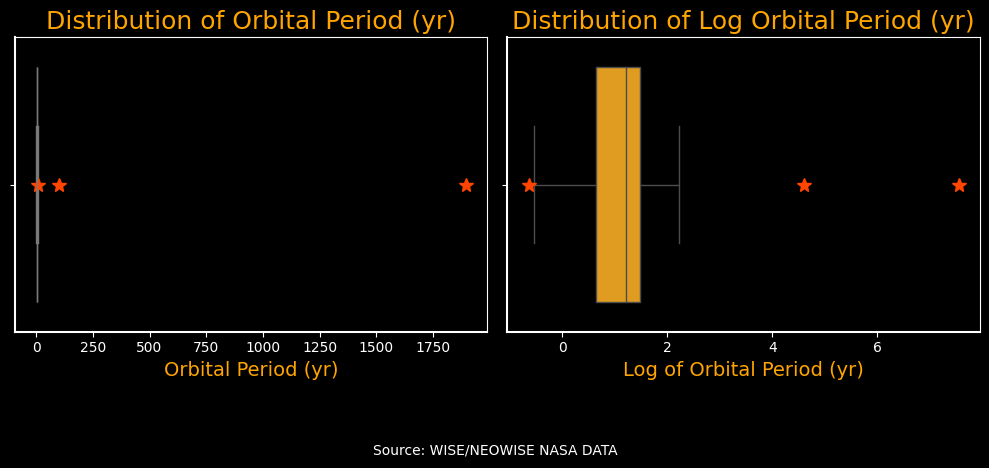

In [21]:
# Setting up for side-by-side comparison
plt.figure(figsize=(10, 4))
plt.style.use('dark_background')

# Creating the first subplot for period (yr)
plt.subplot(1, 2, 1)
sns.boxplot(x=data['period_yr'], color='lightblue',
            flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=10, linewidth=2))
plt.xlabel('Orbital Period (yr)', fontsize=14, color='orange')
plt.title('Distribution of Orbital Period (yr)', fontsize=18, color='orange')

# Enhancing the x and y axes without a grid for clarity
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(visible=False)

# Creating the second subplot for period (yr) log
plt.subplot(1, 2, 2)
sns.boxplot(x=data['period_yr_log'], color='orange',
            flierprops=dict(marker='*', markerfacecolor='#FF4500', markeredgecolor='#FF4500', markersize=10, linewidth=2))
plt.xlabel('Log of Orbital Period (yr)', fontsize=14, color='orange')
plt.title('Distribution of Log Orbital Period (yr)', fontsize=18, color='orange')

# Enhancing the x and y axes
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(visible=False)

# Adding source text at the bottom
plt.figtext(0.5, -0.15, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

plt.tight_layout()

# Show the plot
plt.show()


**Takeaways from the Orbital Period(yr) Graphs:**

- The orbital period of an asteroid represents the time it takes to complete one full orbit around the Sun, measured in years (yr). For context, for earth it's 365 day/1yr.

- The plot on the left shows that there are a few outliers, and an extreme one with orbital periods extending beyond 1000 years. Which should tell us that these NEO are on very elongated or long journey orbits.

- The plot on the right shows the log-transformed orbital periods, which makes the distribution of the typical values more visible. The few extreme outliers are still present, but the majority of values are now easier to examine, showing more clearly the concentration of shorter orbital periods.

- This all means majority of the NEOs which have shorter orbital periods complete their orbits quickly staying closer to Sun & Earth.

# ***HYPOTHESIS***

- After examining the previous graphs, I noticed a similar pattern with the outliers across different variables. Specifically, the aphelion distance (Q_au), perihelion distance (q_au), and orbital period (period_yr) all have outliers that seem related. My thought process is that these outliers could potentially represent the same asteroids, which would make sense based on the definitions of these variables.

- If an asteroid has an extremely long aphelion distance (Q_au), meaning its orbit takes it far from the Sun, it logically follows that its orbital period (period_yr) would also be unusually long—since a larger orbit means more time to complete a revolution. In other words, the longer the Q_au, the longer the orbital period. But of course, we need to confirm this with data.

- **ALSO:** I wondered if they are "far from the Sun/Earth", why are they in the data? My best guess is they we're observed when they traveled the path closer to Earth/Sun making it easy to observe.

- NEXT STEP: If hypothesis is right, the outliers should also correcpond with the outliers of ideg as degree tilt can (from mathematical understanding) elongate the orbital path and increase the distance travelled. We will use data to confirm this after ideg analysis

### **inclination_deg**

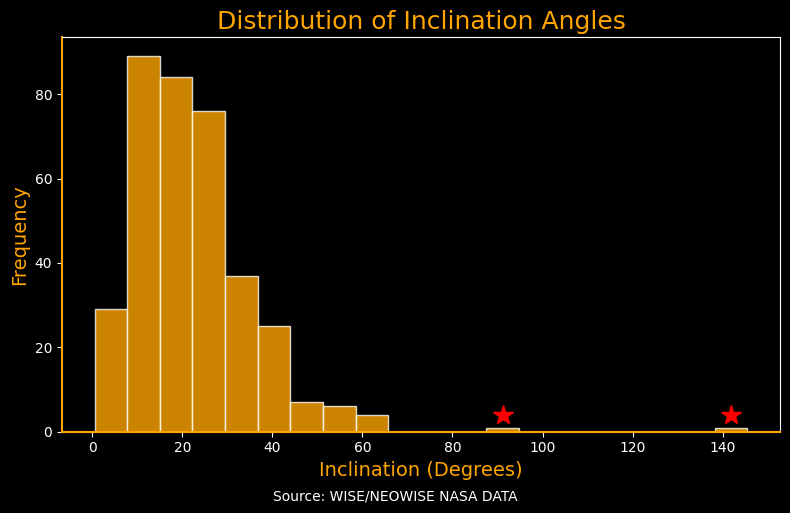

In [22]:
# Setting up the plot for ideg
plt.figure(figsize=(8, 5))
plt.style.use('dark_background')

# Creating a histogram
counts, bins, patches = plt.hist(data['inclination_deg'], bins=20, color='orange', edgecolor='white', alpha=0.8)

# Adding labels and title
plt.xlabel('Inclination (Degrees)', fontsize=14, color='orange')
plt.ylabel('Frequency', fontsize=14, color='orange')
plt.title('Distribution of Inclination Angles', fontsize=18, color='orange')

# Matching the x and y axis to theme
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(visible=False)

# Highlighting the last two bins (outliers hypothesis)
non_zero_indices = np.where(counts > 0)[0]
if len(non_zero_indices) >= 2:
    last_two_indices = non_zero_indices[-2:]
    for idx in last_two_indices:
        bin_center = (bins[idx] + bins[idx + 1]) / 2
        bar_height = counts[idx]
        # Ploting a marker to point out the outliers
        plt.plot(bin_center, bar_height + 3, marker='*', color='red', markersize=15)

# Adding source text
plt.figtext(0.5, -0.01, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

# Displaying the plot
plt.tight_layout()
plt.show()

**Takeaways from the inclination_deg Graph:**

- The inclination angle of an asteroid's orbit is measured in degrees and indicates how "tilted" an asteroid's orbit is relative to Earth's orbit.

- The majority of asteroids have low inclination angles between 0° and 40°. The means they follow a less inclined/tilted path, i.e, they are not too different from Earth's plane,.

- The few asteroids with high inclination angles above 80° are particularly interesting, as they indicate highly tilted orbits, i.e steep angles.


# ***HYPOTHESIS TESTING***


In [23]:
# Identifying with similar outliers with thresholds using the IQR method
q3_q_au = data['q_au'].quantile(0.75)
iqr_q_au = q3_q_au - data['q_au'].quantile(0.25)
threshold_q_au = q3_q_au + 1.5 * iqr_q_au

q3_Q_au = data['Q_au'].quantile(0.75)
iqr_Q_au = q3_Q_au - data['Q_au'].quantile(0.25)
threshold_Q_au = q3_Q_au + 1.5 * iqr_Q_au

q3_period = data['period_yr'].quantile(0.75)
iqr_period = q3_period - data['period_yr'].quantile(0.25)
threshold_period = q3_period + 1.5 * iqr_period

q3_inclination = data['inclination_deg'].quantile(0.75)
iqr_inclination = q3_inclination - data['inclination_deg'].quantile(0.25)
threshold_inclination = q3_inclination + 1.5 * iqr_inclination

# Sorting out the outliers in each variable
outliers_Q_au = data[data['q_au'] > threshold_q_au]
outliers_Q_au = data[data['Q_au'] > threshold_Q_au]
outliers_period = data[data['period_yr'] > threshold_period]
outliers_inclination = data[data['inclination_deg'] > threshold_inclination]

# Finding the common outliers among the variables
common_outliers = outliers_Q_au.merge(outliers_period, on='designation').merge(outliers_inclination, on='designation')

# Displaying the common outliers
print(common_outliers[['q_au', 'designation', 'Q_au', 'period_yr', 'inclination_deg']])

   q_au  designation    Q_au  period_yr  inclination_deg
0  1.25  (2016 XK24)  305.16    1896.28           145.50
1  1.27  (2014 PP69)   41.62      99.31            93.59


## ***Takeaways from the Hypothesis Testing***:

The results show two common outliers across **aphelion distance (Q_au)**, **orbital period (period_yr)**, and **inclination (inclination_deg)**:

1. **Asteroid (2016 XK24)**:
   - **Aphelion Distance (Q_au)**: 305.16 AU — This is extremely far from the Sun, indicating a highly elongated orbit.
   - **Orbital Period (period_yr)**: 1896.28 years — Such a high value indicates that this asteroid takes almost 1900 years to complete one full orbit, which makes sense given its high aphelion distance.
   - **Inclination (inclination_deg)**: 145.50 degrees — This is a very high inclination, suggesting that its orbit is highly tilted compared to the ecliptic plane (Earth's orbital plane).

   Initially, I thought that a high inclination (i_deg) would directly equate to a stretched or elongated orbit, based on intuitive reasoning. However, upon deeper research, I learned that while inclination and eccentricity (which measures orbit elongation) can be correlated, they do not inherently dictate each other's values. In other words, a high inclination does not automatically mean an orbit is highly eccentric. Instead, these orbital characteristics often correlate due to external gravitational influences or shared historical events, like asteroid collisions. In examining the data for the specific asteroids in question, it appears there is indeed a correlation in this instance, confirming that sometimes these orbital attributes can align.
   
2. **Asteroid (2014 PP69)**:
   - **Aphelion Distance (Q_au)**: 41.62 AU — This means that this asteroid travels quite far, indicating a very elongated orbit.
   - **Orbital Period (period_yr)**: 99.31 years — The period is relatively long, but consistent with its aphelion distance. It takes nearly a century to complete an orbit.
   - **Inclination (inclination_deg)**: 93.59 degrees — This is also a very high inclination as well.

### **Main Takeaway**:
This result **confirm my hypothesis** that the extreme **orbital period** outliers correspond to extreme values in **aphelion distance** and **inclination**. This is intuitive since:
- A larger **aphelion distance** means the asteroid travels farther from the Sun, leading to a **longer orbital period**.
- High **inclination** values indicate orbits that are steeply tilted, which can also influence how the asteroid moves through its orbit compared to other bodies.

### **Note**:
From a novice perspective, this process of confirming relationships through data has deepened my understanding of how orbital mechanics work. Although these connections may seem obvious to domain experts, arriving at this understanding through data analysis has made it feel much more tangible and fun! Learning directly from the data allowed me to appreciate the interconnections between **distance**, **period**, and **inclination**, despite not having prior domain knowledge. This journey from questioning to validating a hypothesis has been particularly insightful and intuitive in retrospect.

# **Critique from a Domain Knowledge Enthusiast & My Response**

### **Critique:**  
"If q>1.3 au, the object is not an NEO. If Q is much larger than q, the object might be a comet."  

### **My Response:**  
I realize now that I made a mistake by not clearly highlighting that earlier in my project that I often referred to NEOs as "asteroids" for simplicity. I chose the term "asteroids" because it's more mentally visual and relatable for most readers, but this could have caused confusion. This critique prompted me to clarify this distinction and ensure I explicitly define NEOs in the context of my project as objects—including both asteroids and comets. I've updated my project to reflect this definition clearly.

### **pha**

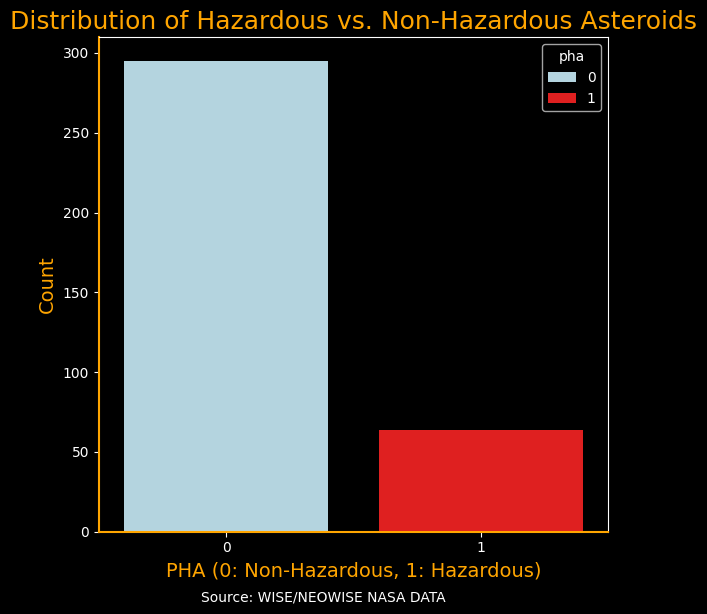

In [24]:
# Setting up plot
plt.figure(figsize=(6, 6))
plt.style.use('dark_background')

# Plotting count of hazardous (PHA) vs. non-hazardous asteroids
sns.countplot(x='pha', data=data, palette=['lightblue', 'red'], hue='pha', dodge=False)

# Customizing the plot
plt.title('Distribution of Hazardous vs. Non-Hazardous Asteroids', fontsize=18, color='orange')
plt.xlabel('PHA (0: Non-Hazardous, 1: Hazardous)', fontsize=14, color='orange')
plt.ylabel('Count', fontsize=14, color='orange')

# Matching axes theme
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(visible=False)

# Adding source text a
plt.figtext(0.5, -0.01, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

# Displaying plot
plt.tight_layout()
plt.show()

**pha Takeaways**
- PHA (Potentially Hazardous Asteroid) classifies NEOs into two categories 0 (N) for Non-Hazardous and 1 (Y) for Hazardous.

- The chart shows that the vast majority of asteroids in the dataset are classified as non-hazardous.These are classfied by NASA as objects that do not pose a significant threat to Earth.

- A smaller portion of the asteroids ~50 are classified by NASA as potentially hazardous. This indicates that, while these asteroids are a minority, they are significant due to their potential risk of impact.

- NOTE: The dataset is heavily skewed towards non-hazardous asteroids, which could influence how models are be trained especially since the smaller group should hold more risk/weight.

### **orbit_class**

<ipython-input-25-2c0a030c593f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orbit_class_counts.index, y=orbit_class_counts.values, palette=palette, edgecolor='orange')


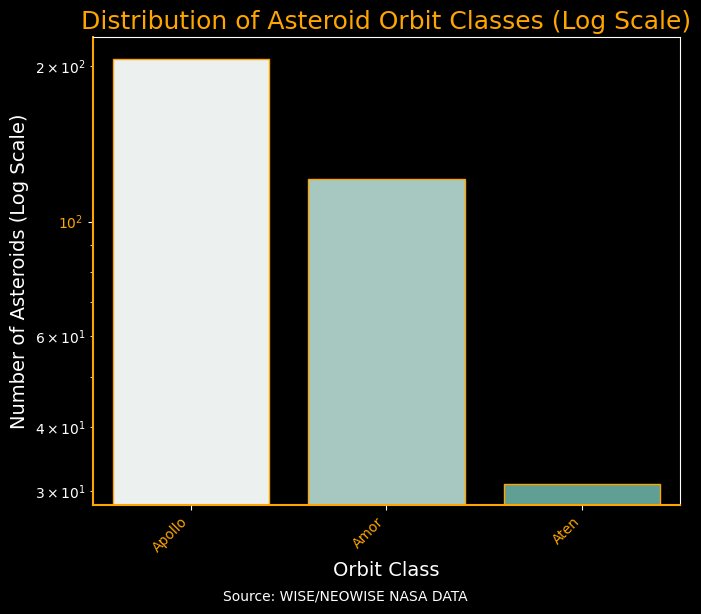

In [25]:
# Setting up plot
plt.figure(figsize=(7, 6))
plt.style.use('dark_background')

# Count the number of occurrences of each orbit class
orbit_class_counts = data['orbit_class'].value_counts()

# Creating a color palette that matches the number of orbit classes (trying something new)
num_classes = len(orbit_class_counts)
palette = sns.color_palette("light:#5A9", n_colors=num_classes)

# Plotting with the color palette
sns.barplot(x=orbit_class_counts.index, y=orbit_class_counts.values, palette=palette, edgecolor='orange')

# Applying log transformation to the y-axis (as it was hard to visualize orbits with smaller counts)
plt.yscale('log')

# Adding labels and title
plt.xlabel('Orbit Class', fontsize=14, color='white')
plt.ylabel('Number of Asteroids (Log Scale)', fontsize=14, color='white')
plt.title('Distribution of Asteroid Orbit Classes (Log Scale)', fontsize=18, color='orange')

# Enhancing the axes to match theme
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.xticks(rotation=45, ha='right', color='orange')
plt.yticks(color='orange')

plt.grid(visible=False)

# Adding source text at the bottom
plt.figtext(0.5, -0.01, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

plt.tight_layout()

# Display the plot
plt.show()

**orbit_class Takeaways**

As a novice, I did some research to understand the different orbit classes of asteroids and why they are labeled that way. It is based on factors like q(au), Q(au), ideg & Semi-major Axis. Which makes sense as these classes match the observed distribution seen in other graphs and provide context for why some classes are more common than others.

**Orbit Classes:**
- Apollo: Earth-crossing asteroids with Q > 1 AU and longer orbital periods than Earth. Their frequent intersection with Earth's orbit makes them the most common.
- Amor: Asteroids with 1.017 AU < q < 1.3 AU, approaching but not crossing Earth's orbit. Their proximity makes them prevalent.
- Aten: Earth-crossing asteroids with semi-major axis < 1 AU and shorter orbital periods, less frequent than Apollo and Amor.
- Mars-crossing and Outer Main-belt Asteroids: These are less common as they either cross Mars's orbit or stay in the main belt, farther from Earth.

This explains why certain classes dominate the dataset and how their orbits influence their detectability and potential risk.



In [26]:
data.head()

,designation,discovery_date,h_mag,moid_au,q_au,Q_au,period_yr,inclination_deg,pha,orbit_class,h_mag_log,moid_au_log,Q_au_log,period_yr_log,discovery_year
0,(2024 FL4),2024-03-31,21.61,0.097,1.07,3.77,3.76,15.58,0,Amor,3.073156,-2.333034,1.327075,1.324419,2024
1,(2024 ET5),2024-03-14,20.68,0.238,1.16,4.23,4.42,15.23,0,Amor,3.029167,-1.435480,1.442202,1.486140,2024
2,(2024 EO2),2024-03-01,19.08,0.195,1.19,4.55,4.86,54.73,0,Amor,2.948641,-1.634751,1.515127,1.581039,2024
3,(2024 AP7),2024-01-15,19.79,0.224,0.59,2.91,2.31,24.54,0,Apollo,2.985177,-1.496105,1.068153,0.837248,2024
4,(2024 AF6),2024-01-13,20.67,0.132,0.43,1.02,0.62,15.05,0,Aten,3.028683,-2.024946,0.019804,-0.478034,2024


**Observational Summary:**

- Dataset Overview: The NEO dataset exhibits a right-skewed distribution for several variables such as **Orbital Period**, **Perihelion Distance (q_au)**, and **Absolute Magnitude (H_mag)**. The majority of NEOs have shorter periods, closer perihelion distances, and smaller sizes (higher H_mag values), with outliers showing significantly larger or longer values.

**Questions Raised In My Mind:**

- What causes the concentration of smaller periods, distances, and sizes in the NEO data?
- How do the outliers and overall skew in the data arise?

---

**Research and Insights:**

1. **Detection Bias**:
   - NEOs with shorter periods and smaller perihelion distances are detected more frequently due to their closer proximity to Earth, enhancing their visibility with current observational technologies.

2. **Inherent Data Characteristics**:
   - The definition of NEOs—objects with a perihelion distance less than 1.3 AU—naturally focuses on asteroids closer to Earth, resulting in a dataset skewed towards smaller distances and shorter periods.

3. **Outliers and Orbital Diversity**:
   - NEOs with long orbital periods or large distances appear as outliers. These are less common but can be observed when their paths brings them closer to Earth.

4. **Mission Influence and Technology**:
   - Shifts in mission focus, particularly the transition from WISE to NEOWISE, have emphasized the detection of smaller, near-Earth asteroids. Improvements in infrared detection technology also increase the likelihood of discovering smaller or less reflective asteroids (h_mag analysis coming into play!).

5. **Observational Timing**:
   - NEOs are often detected near their perihelion when they are brightest and most visible, leading to a prevalence of data points with smaller distances.

-----
-----
-----

**References:**

- [NASA CNEOS - NEO Groups](https://cneos.jpl.nasa.gov/about/neo_groups.html)
- [NASA CNEOS - Near-Earth Object Discovery](https://cneos.jpl.nasa.gov/about/biases.html)
- [NASA NEOWISE Mission](https://www.nasa.gov/mission_pages/neowise/main/index.html)
- [NASA Planetary Defense - NEOWISE](https://www.nasa.gov/planetarydefense/neowise)
- [NASA JPL - NEO Basics](https://neo.jpl.nasa.gov/neo/basic.html)
- [NASA Solar System Exploration - Asteroids](https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/)

# **Exploratory Data Analysis (EDA)**

## **Multivariate Analysis**

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      359 non-null    object        
 1   discovery_date   359 non-null    datetime64[ns]
 2   h_mag            359 non-null    float64       
 3   moid_au          359 non-null    float64       
 4   q_au             359 non-null    float64       
 5   Q_au             359 non-null    float64       
 6   period_yr        359 non-null    float64       
 7   inclination_deg  359 non-null    float64       
 8   pha              359 non-null    int64         
 9   orbit_class      359 non-null    object        
 10  h_mag_log        359 non-null    float64       
 11  moid_au_log      359 non-null    float64       
 12  Q_au_log         359 non-null    float64       
 13  period_yr_log    359 non-null    float64       
 14  discovery_year   359 non-null    int32         

**Correlation Heatmap: Choseen to help guide what multivariate analysis is worth doing and looking into**

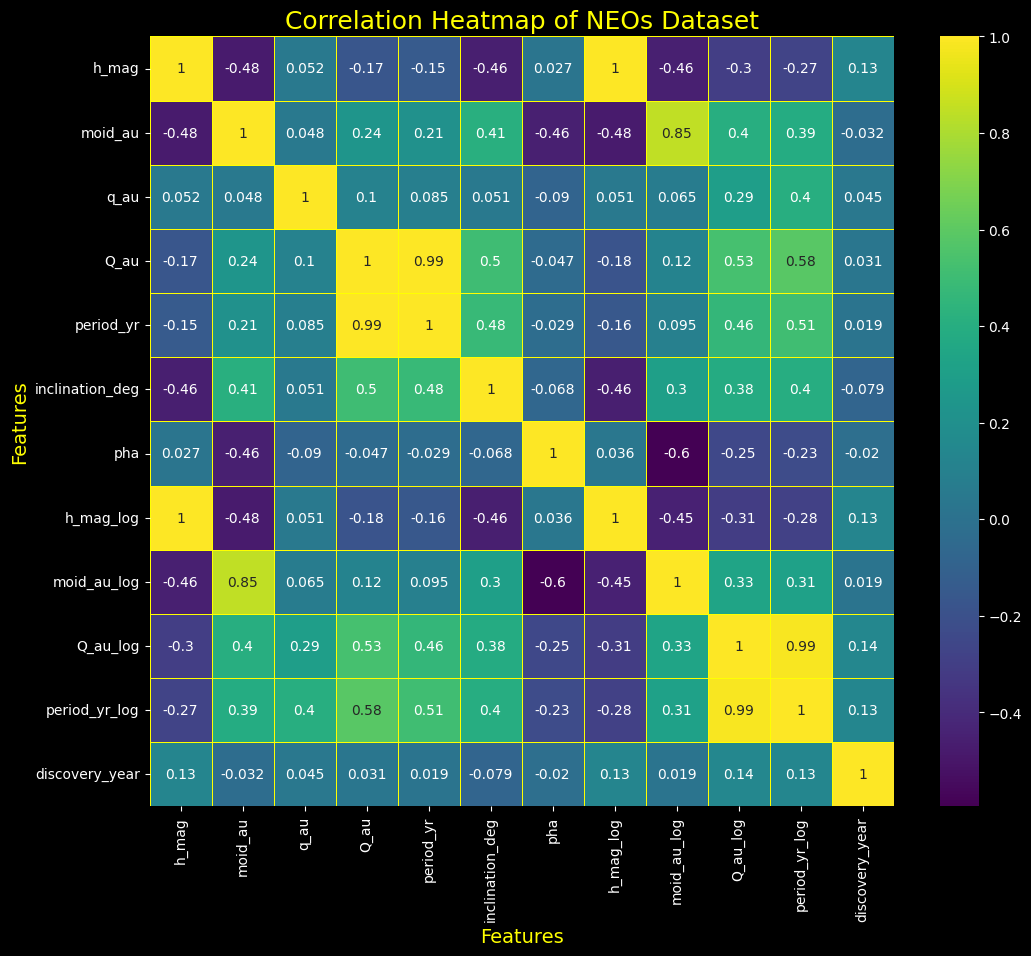

In [28]:
# Select only numerical columns for the correlation heatmap
numerical_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
plt.style.use('dark_background')  # Set a space-themed dark background

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='yellow')

# Adding labels and title
plt.title('Correlation Heatmap of NEOs Dataset', fontsize=18, color='yellow')
plt.xlabel('Features', fontsize=14, color='yellow')
plt.ylabel('Features', fontsize=14, color='yellow')

# Plot Display
plt.show()

### **Correlation Heatmap Summary:**
From exploring the correlation heatmap, it's help better undertand why NEOs are classified as potentially hazardous or not.

**Key Observations:**

- **MOID_au/MOID_au_log and PHA (-0.6/-0.45 correlation):** The smaller the MOID, the closer the asteroid comes to Earth's orbit, increasing its likelihood of being classified as potentially hazardous. This makes sense—asteroids that pass near Earth's orbital path pose a greater risk of collision and are naturally flagged as more dangerous.

- **Orbital Period and Aphelion Distance (Period_yr & Q_au, 0.99 correlation):** A longer orbital period is highly linked to a larger aphelion distance (the farthest point from the Sun). This means asteroids with elongated orbits (large Q_au) take more time to complete a single orbit around the Sun, reinforcing the relationship between orbit shape and travel time.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      359 non-null    object        
 1   discovery_date   359 non-null    datetime64[ns]
 2   h_mag            359 non-null    float64       
 3   moid_au          359 non-null    float64       
 4   q_au             359 non-null    float64       
 5   Q_au             359 non-null    float64       
 6   period_yr        359 non-null    float64       
 7   inclination_deg  359 non-null    float64       
 8   pha              359 non-null    int64         
 9   orbit_class      359 non-null    object        
 10  h_mag_log        359 non-null    float64       
 11  moid_au_log      359 non-null    float64       
 12  Q_au_log         359 non-null    float64       
 13  period_yr_log    359 non-null    float64       
 14  discovery_year   359 non-null    int32         

## **moid_au_log & PHA**

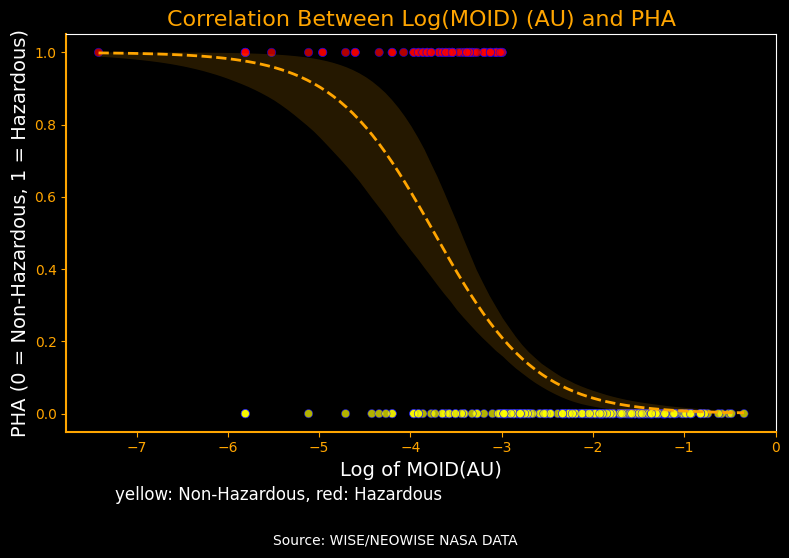

In [30]:
# Setting up the plot
plt.figure(figsize=(8, 5))
plt.style.use('dark_background')

# Creating a scatter plot
pha_colors = {0: 'yellow', 1: 'red'}
pha_labels = {0: 'Non-Hazardous', 1: 'Hazardous'}
pha_colors_series = data['pha'].map(pha_colors)

scatter = plt.scatter(
    data['moid_au_log'],
    data['pha'],
    c=pha_colors_series,
    alpha=0.7,
    edgecolor='b',
    linewidth=0.5
)

# Adding a trend line to emphasis the correlation
sns.regplot(
    x='moid_au_log',
    y='pha',
    data=data,
    scatter=False,
    color='orange',
    line_kws={'linestyle': '--', 'linewidth': 2},
    logistic=True
)

# Setting labels and title
plt.title('Correlation Between Log(MOID) (AU) and PHA', fontsize=16, color='orange')
plt.xlabel('Log of MOID(AU)', fontsize=14, color='white')
plt.ylabel('PHA (0 = Non-Hazardous, 1 = Hazardous)', fontsize=14, color='white')

# Emphasizing axes with the same theme
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.tick_params(axis='x', colors='orange')
plt.tick_params(axis='y', colors='orange')

# Noting colors used for PHA values
plt.figtext(0.15, -0.01, 'yellow: Non-Hazardous, red: Hazardous', fontsize=12, color='white')

# Removing gridllines
plt.grid(visible=False)

# Adding source text at the bottom
plt.figtext(0.5, -0.1, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

plt.tight_layout()

# Showing the plot
plt.show()

This plot vividly confirms the strong negative correlation between the Minimum Orbit Intersection Distance (MOID) and the classification of asteroids as potentially hazardous (PHA). As the log of MOID decreases, indicating closer proximity to Earth's orbit, the likelihood of an asteroid being classified as hazardous significantly increases. This pattern underscores the critical role that proximity plays in hazard assessment, aligning with the expectation that asteroids closer to Earth pose a greater risk.

## **period_yr_log & Q_au_log**

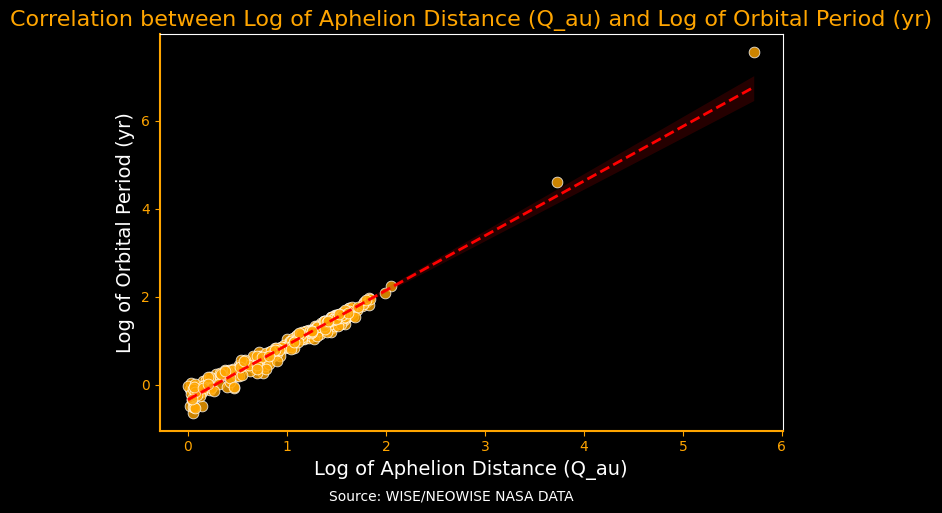

In [31]:
# Setting up plot
plt.figure(figsize=(7, 5))
plt.style.use('dark_background')

# Creating scatter plot
sns.scatterplot(x=data['Q_au_log'], y=data['period_yr_log'], color='orange', alpha=0.8, s=60)

# Adding a trend line to illustrate the relationship
sns.regplot(x='Q_au_log', y='period_yr_log', data=data, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2})

# Adding plot title and labels
plt.title('Correlation between Log of Aphelion Distance (Q_au) and Log of Orbital Period (yr)', fontsize=16, color='orange')
plt.xlabel('Log of Aphelion Distance (Q_au)', fontsize=14, color='white')
plt.ylabel('Log of Orbital Period (yr)', fontsize=14, color='white')

# Emphasizing axes with theme style
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.tick_params(axis='x', colors='orange')
plt.tick_params(axis='y', colors='orange')

# Removing grid lines for a cleaner look
plt.grid(visible=False)

# Adding source text at the bottom without overlapping with axes or labels
plt.figtext(0.5, -0.01, 'Source: WISE/NEOWISE NASA DATA', fontsize=10, color='white', ha='center')

# Showing the plot
plt.tight_layout()
plt.show()


The correlation plot effectively demonstrates the strong positive relationship between Q_au_log & period_yr_log.

**Further research** confirms this as **the Kepler's laws of planetary motion**, where the size of an orbit dictates its period, highlighting the predictable nature of celestial mechanics in the solar system.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   designation      359 non-null    object        
 1   discovery_date   359 non-null    datetime64[ns]
 2   h_mag            359 non-null    float64       
 3   moid_au          359 non-null    float64       
 4   q_au             359 non-null    float64       
 5   Q_au             359 non-null    float64       
 6   period_yr        359 non-null    float64       
 7   inclination_deg  359 non-null    float64       
 8   pha              359 non-null    int64         
 9   orbit_class      359 non-null    object        
 10  h_mag_log        359 non-null    float64       
 11  moid_au_log      359 non-null    float64       
 12  Q_au_log         359 non-null    float64       
 13  period_yr_log    359 non-null    float64       
 14  discovery_year   359 non-null    int32         

# **Modelling Section**

In [33]:
# Duplicating the DataFrame to avoid making chnages to it and for easy trial and error
data_4_model = data.copy()

# Removing the non-numeric and duplicte columns
columns_to_remove = ['designation', 'discovery_date', 'h_mag_log', 'moid_au_log', 'Q_au_log', 'period_yr_log', 'orbit_class', 'discovery_year']
data_4_model.drop(columns=columns_to_remove, inplace=True)

# Displaying the first few rows
data_4_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_mag            359 non-null    float64
 1   moid_au          359 non-null    float64
 2   q_au             359 non-null    float64
 3   Q_au             359 non-null    float64
 4   period_yr        359 non-null    float64
 5   inclination_deg  359 non-null    float64
 6   pha              359 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.4 KB


## **Feature Importance Comparison and Model Selection Insight**

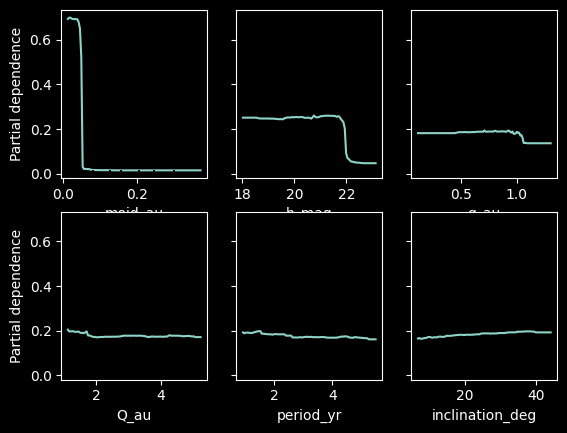

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# Train a Random Forest Model
features = ['moid_au', 'h_mag', 'q_au', 'Q_au', 'period_yr', 'inclination_deg']
X = data_4_model[features]
y = data_4_model['pha']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Generate Partial Dependence Plots for selected features by name
PartialDependenceDisplay.from_estimator(rf_model, X, features=['moid_au', 'h_mag', 'q_au', 'Q_au', 'period_yr', 'inclination_deg'])

# **TAKEAWAYS**

1. **Multicollinearity Insight:** Since period_yr_log & Q_au_log showed a 0.99 correletion in the EDA heatmap earlier, I thought dropping one will remove the issue of multicollinearity. Based on the very slightly higher visual explanatory power demonstrated by Q_au_log in the Partial Dependence Plot, I decided to drop 'period_yr_log' from my data.


2. **Model Selection Insight:**

Moid_au_log, h_mag_log, & q_au show non-linear relationships with PHA. The PDPs show sharp drops indicating that the probability of an asteroid being hazardous changes non-linearly with these features. This tells us that the model I choose should be capable of capturing non-linear patterns for better prediction.

**Prioritized List of Models Based on "Handling Non-Linearity, Handling Class Imbalance, Minimizing False Negatives, Interpretability & Robustness, Handling Outliers"**

a. **Gradient Boosting Machines (LightGBM; computationally favourable)**
b. **Random Forest**
c. **Support Vector Machines with Radial Basis Function Kernels**

3. I applied logarithmic transformations during EDA to better visualize and interpret the skewed distributions caused by outliers, but changed my mind and chose not to train the model on the log-transformed variables.
- Reasons: For deployment, I wanted to keep the input process straightforward so users wouldn't need to preprocess variables by applying logarithms.
- Additionally, the outliers in the dataset weren't errors—they represented actual NEOs with valid characteristics. Applying a log transformation could compress these values and potentially reduce their impact or interpretability in the model.
- Finally, after the PDP and selecting ensemble methods that naturally handle nonlinearity and outliers, the model performed effectively without requiring transformations. This approach maintains simplicity for users while ensuring the model preserves the integrity and meaning of the original data.

In [35]:
# Dropping 'period_yr_log'
data_4_model.drop(columns=['period_yr'], inplace=True)

In [36]:
print(data_4_model.info())

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_mag            359 non-null    float64
 1   moid_au          359 non-null    float64
 2   q_au             359 non-null    float64
 3   Q_au             359 non-null    float64
 4   inclination_deg  359 non-null    float64
 5   pha              359 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.6 KB
None


# **Modelling (WISE/NEOWISE DATA)**

**Baseline/Default:** I will test all models with default initially with balanced class weights (given the EDA on the pha class done earlier).

**I avoided SMOTE**. My reasoning was since it doesn't generate new data based on the underlying physical laws but rather by interpolating between existing data points maybe it could produce feature combinations that are not physically meaningful. This might be a DS inexperience perspective but I thought it was a safer option. Would love feedback on this and many other things! :)

# **Feedback from a Domain Knowledge Enthusiast Regarding Avoiding SMOTE**
"I think this was a good call."


**Models:**
- Gradient Boosting (e.g., LightGBM/XGBoost)
- Random Forest
- SVM with RBF Kernel



# 1. **1st Model (WISE/NEOWISE DATA): LightGBM**

In [37]:
# Separating features and target variable
X = data_4_model.drop('pha', axis=1)
y = data_4_model['pha']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculating for class weights
positive_weight = (y == 0).sum() / (y == 1).sum()

# Creating model with balanced class weights
model = lgb.LGBMClassifier(class_weight={0: 1, 1: positive_weight}, random_state=42)

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 46, number of negative: 241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468028 -> initscore=-0.128063
[LightGBM] [Info] Start training from score -0.128063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [38]:
# Performing cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 58, number of negative: 265
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 323, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502201 -> initscore=0.008805
[LightGBM] [Info] Start training from score 0.008805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

**The warnings about no further splits with positive gain I think is likely due to the small dataset size and limited feature variability. Despite these warnings, the model achieved excellent metrics even after cross-validation.**
- Hence, the warnings have been noted but not corrected for this analysis

# 2. **2nd Model (WISE/NEOWISE DATA): Random Forest**

In [39]:
# Separating features and target variable
X_rf = data_4_model.drop('pha', axis=1)
y_rf = data_4_model['pha']

# Splitting data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Calculating for class weights
positive_weight_rf = (y_rf == 0).sum() / (y_rf == 1).sum()

# Creating model with balanced class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: positive_weight_rf}, random_state=42)

# Training model
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluating the model
print(classification_report(y_test_rf, y_pred_rf))
print(confusion_matrix(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        18

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

[[54  0]
 [ 0 18]]


In [40]:
# Performing 10-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_rf, y_rf, cv=10, scoring='accuracy')

print("Cross-validation scores:", rf_cv_scores)
print("Average accuracy:", rf_cv_scores.mean())

Cross-validation scores: [1.         1.         0.97222222 1.         1.         1.
 1.         0.94444444 1.         1.        ]
Average accuracy: 0.9916666666666668


**Both LightGBM and Random Forest** achieved perfect test set results, with 100% accuracy, precision, recall, and F1-scores, correctly classifying all 73 asteroids (54 non-hazardous and 19 hazardous) without any false positives or false negatives. In cross-validation, both models performed exceptionally well - LightGBM achieved an average accuracy of 99.17% across 10 folds, while Random Forest achieved an identical average accuracy of 99.17%. Both models effectively handle outliers and nonlinearity well!

# **3. 3rd Model (WISE/NEOWISE DATA): Support Vector Machines with Radial Basis FunctionKernels**

In [41]:
# Separating features and target variable
X_svm = data_4_model.drop('pha', axis=1)
y_svm = data_4_model['pha']

# Splitting data into training and testing sset
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# Calculating class weights
positive_weight_svm = (y_svm == 0).sum() / (y_svm == 1).sum()

# Creating model with RBF kernel & balanced class weights
svm_model = SVC(kernel='rbf', class_weight={0: 1, 1: positive_weight_svm}, random_state=42, probability=True)

# Training the model
svm_model.fit(X_train_svm, y_train_svm)
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluating the model
print("SVM with RBF Kernel - Classification Report:")
print(classification_report(y_test_svm, y_pred_svm))
print("SVM with RBF Kernel - Confusion Matrix:")
print(confusion_matrix(y_test_svm, y_pred_svm))

SVM with RBF Kernel - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        54
           1       0.27      0.17      0.21        18

    accuracy                           0.68        72
   macro avg       0.51      0.51      0.50        72
weighted avg       0.63      0.68      0.65        72

SVM with RBF Kernel - Confusion Matrix:
[[46  8]
 [15  3]]


**Given that the base models of LightGBM and Random Forest significantly outperformed SVM, I have decided to proceed with these two models instead.**

# **TOO GOOD TO BE TRUE?**

I was excited to see that both LightGBM and Random Forest model achieved perfect accuracy, precision, recall, and F1-scores with the small dataset I had. However, this prompted me to question whether this small dataset was sufficient for a reliable, generalizable model. To elimate any doubt of ovefitting, **the need for a another data set or a larger one to test model or retrain** arose. This led me to explore more NASAs pages and I discovered more extensive data in the JPL Small-Body Database Query, which I had initially overlooked due to my project enthusiasm and focus on the WISE/NEOWISE Project. This experience taught me an important lesson: always take the time to do deeper research to ensure the data is comprehensive, as more valuable resources may exist.

# **Testing with Larger Unseen Data**
- Source: [JPL Small-Body Database Query](https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results)
- This Large Data is 36750 entries
- I've decided to first test the model created from the WISE/NEOWISE data and see how well it holds agasint the new found data.

In [42]:
# Recalling what WISE/NEOWISE modelling data looks like
print(data_4_model.info())

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 397
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_mag            359 non-null    float64
 1   moid_au          359 non-null    float64
 2   q_au             359 non-null    float64
 3   Q_au             359 non-null    float64
 4   inclination_deg  359 non-null    float64
 5   pha              359 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.6 KB
None


# **Large Data Test On WISE/NEOWISE Models**

In [43]:
from google.colab import drive

# Importing larger data
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/larger_unseen_data_4project.csv'

# Loading the dataset
import pandas as pd
large_data = pd.read_csv(file_path)

# Displaying the first few rows
print(large_data.info())
print(large_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36750 entries, 0 to 36749
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       36750 non-null  object 
 1   q               36750 non-null  float64
 2   i               36750 non-null  float64
 3   pha             36517 non-null  object 
 4   H               36540 non-null  float64
 5   moid            36719 non-null  float64
 6   ad              36750 non-null  float64
 7   first_obs       36748 non-null  object 
 8   condition_code  36740 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.5+ MB
None
                  full_name      q      i pha      H    moid    ad  \
0        433 Eros (A898 PA)  1.133  10.83   N  10.41  0.1500  1.78   
1      719 Albert (A911 TB)  1.195  11.58   N  15.59  0.2010  4.08   
2

In [44]:
large_data.describe().T

,count,mean,std,min,25%,50%,75%,max
q,36750.0,0.914941,0.224693,2.800000e-02,0.7920,0.9630,1.060,1.300
i,36750.0,12.034103,10.996672,1.000000e-02,4.4200,8.5100,16.770,172.510
H,36540.0,23.545069,2.885705,9.200000e+00,21.4100,23.8900,25.650,33.580
moid,36719.0,0.085328,0.098310,1.520000e-07,0.0128,0.0449,0.127,0.708
ad,36750.0,2.663436,4.564488,6.500000e-01,1.6700,2.4400,3.370,676.590
condition_code,36740.0,5.198231,3.189725,0.000000e+00,2.0000,7.0000,8.000,9.000


The large dataset shows potential outliers in features like perihelion distance (q), aphelion distance (ad) which is our small dataset's Q(au), minimum orbit intersection distance (moid), and absolute magnitude (H), as seen where the max values are significantly higher than the 75th percentiles (e.g., max aphelion distance is 676.59 AU compared to the 75th percentile of 3.37 AU). This is similar to the small dataset, where such extreme values were found to represent actual NEOs with valid characteristics, though a detailed EDA is needed to confirm this for the larger dataset.

In [45]:
# Goal is to make larger data look like the data used for WISE/NEOWISE modelling.

# Keeping necessary columns
large_data = large_data[['q', 'i', 'pha', 'H', 'moid', 'ad']]

# Remove rows with missing pha values
large_data = large_data.dropna()

# Renaming columns to match target
large_data.rename(columns={
    'q': 'q_au',
    'i': 'inclination_deg',
    'H': 'h_mag',
    'moid': 'moid_au',
    'ad': 'Q_au'
}, inplace=True)

# Display larger df
print(large_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36514 entries, 0 to 36543
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   q_au             36514 non-null  float64
 1   inclination_deg  36514 non-null  float64
 2   pha              36514 non-null  object 
 3   h_mag            36514 non-null  float64
 4   moid_au          36514 non-null  float64
 5   Q_au             36514 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.0+ MB
None


In [46]:
# Converting pha column to 0's and 1's
large_data['pha'] = large_data['pha'].astype(str).map({'Y': 1, 'N': 0})

# Rearranging
large_data = large_data[['h_mag', 'moid_au', 'q_au', 'Q_au', 'inclination_deg', 'pha']]

print(large_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36514 entries, 0 to 36543
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_mag            36514 non-null  float64
 1   moid_au          36514 non-null  float64
 2   q_au             36514 non-null  float64
 3   Q_au             36514 non-null  float64
 4   inclination_deg  36514 non-null  float64
 5   pha              36514 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.0 MB
None


### **Large Data Test On WISE/NEOWISE (LightGBM & Random Forest) Model**

In [47]:
# Separating features and target variable
X_large = large_data.drop('pha', axis=1)
y_large = large_data['pha']

# Confirming consistency in feature order
X_large = X_large[X.columns]

### **Predictions and evaluation for LightGBM (WISE/NEOWISE DATA) Model with large_data**

In [48]:
# Making predictions on the unseen large_data
y_pred_large_lgb = model.predict(X_large)

# Evaluation
print("LightGBM - Classification Report:")
print(classification_report(y_large, y_pred_large_lgb))
print("LightGBM - Confusion Matrix:")
print(confusion_matrix(y_large, y_pred_large_lgb))

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34060
           1       1.00      0.95      0.97      2454

    accuracy                           1.00     36514
   macro avg       1.00      0.98      0.99     36514
weighted avg       1.00      1.00      1.00     36514

LightGBM - Confusion Matrix:
[[34049    11]
 [  112  2342]]


### **Predictions and evaluation for Random Forest (WISE/NEOWISE DATA) Model with large_data**

In [49]:
# Making predictions on the unseen large_data
y_pred_large_rf = rf_model.predict(X_large)

# Evaluation
print("Random Forest - Classification Report:")
print(classification_report(y_large, y_pred_large_rf))
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_large, y_pred_large_rf))

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34060
           1       0.99      0.95      0.97      2454

    accuracy                           1.00     36514
   macro avg       0.99      0.98      0.99     36514
weighted avg       1.00      1.00      1.00     36514

Random Forest - Confusion Matrix:
[[34040    20]
 [  111  2343]]


**When tested on the larger dataset of 36,514 entries, both LightGBM and Random Forest showcased impressive performance, highlighting subtle differences in how they managed potentially hazardous asteroids. LightGBM recorded 112 false negatives (hazardous asteroids that were missed) and 11 false positives (non-hazardous asteroids incorrectly flagged as hazardous). Conversely, Random Forest missed 111 hazardous asteroids and incorrectly flagged 20 non-hazardous ones.**

**Although both models demonstrated strong performance with equal recall, LightGBM showed a slight advantage in minimizing false negatives, making it the preferable choice for now in enhancing accuracy in hazardous asteroid detection.**

# **Hyperparameter Tuning (WISE/NEOWISE DATA) Models**

While the base/default models show good results, hyperparameter tuning can offer an improved performance especially with minimizing false negatives. The current models missed 112 (LightGBM) and 111 (Random Forest) hazardous asteroids, respectively, highlighting the need for optimization. Using GridSearchCV, I prioritized recall for detecting potentially hazardous asteroids (PHA = 1), given the critical importance of identifying true positives. For LightGBM, parameters such as  `n_estimators`, `max_depth`, `learning_rate`, and `num_leaves` were tuned. For Random Forest,  `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf` were adjusted. In both models, I incorporated balanced class weights to address the data imbalance and cross-validation to ensure the selected parameters generalized well.

### 1. **LightGBM (WISE/NEOWISE DATA) Model with Hyperparameter Tuning**

In [50]:
# Separating features and target
X_hptn_lgb = data_4_model.drop('pha', axis=1)
y_hptn_lgb = data_4_model['pha']

# Splitting data into training and testing sets
X_train_hptn_lgb, X_test_hptn_lgb, y_train_hptn_lgb, y_test_hptn_lgb = train_test_split(X_hptn_lgb, y_hptn_lgb, test_size=0.2, random_state=42)

# Calculating class weights
positive_weight_hptn_lgb = (y_hptn_lgb == 0).sum() / (y_hptn_lgb == 1).sum()

# Creating model with balanced class weights
model_hptn_lgb = lgb.LGBMClassifier(class_weight={0: 1, 1: positive_weight}, random_state=42)

# Defining custom scoring to prioritize recall for class 1, i.e, PHA = 1 with minimal precision loss
scoring = make_scorer(recall_score, average='binary', pos_label=1)

# Setting up GridSearchCV
param_grid_hptn_lgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30]
}

# Running grid search
grid_search_hptn_lgb = GridSearchCV(estimator=model_hptn_lgb, param_grid=param_grid_hptn_lgb, scoring=scoring, cv=5, verbose=2, n_jobs=-1)

# Fitting the model
grid_search_hptn_lgb.fit(X_train_hptn_lgb, y_train_hptn_lgb)

# Evaluating tje model
best_model_hptn_lgb = grid_search_hptn_lgb.best_estimator_
y_pred_lgb_hptn = best_model_hptn_lgb.predict(X_test_hptn_lgb)

print("LightGBM Classification Report (hptn):\n", classification_report(y_test_hptn_lgb, y_pred_lgb_hptn))
print("Confusion Matrix:\n", confusion_matrix(y_test_hptn_lgb, y_pred_lgb_hptn))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 46, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 287, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.468028 -> initscore=-0.128063
[LightGBM] [Info] Start training from score -0.128063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

# 2. **Random Forest (WISE/NEOWISE DATA) Model with Hyperparameter Tuning**

In [51]:
# Creating model with balanced class weights
model_hptn_rf = RandomForestClassifier(class_weight={0: 1, 1: positive_weight_rf}, random_state=42)

# Setting up GridSearchCV
param_grid_hptn_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Running grid search
grid_search_hptn_rf = GridSearchCV(estimator=model_hptn_rf, param_grid=param_grid_hptn_rf, scoring=scoring, cv=5, verbose=2, n_jobs=-1)

# Fitting the model
grid_search_hptn_rf.fit(X_train_rf, y_train_rf)

# Evaluating the model
best_model_hptn_rf = grid_search_hptn_rf.best_estimator_
y_pred_rf_hptn = best_model_hptn_rf.predict(X_test_rf)

print("Random Forest Classification Report (hptn):\n", classification_report(y_test_rf, y_pred_rf_hptn))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf_hptn))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Classification Report (hptn):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        18

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Confusion Matrix:
 [[54  0]
 [ 0 18]]


### **Large Data Test On Hyperparameter Tuning (WISE/NEOWISE DATA) Models**

In [52]:
# Separating features and target variable (large_data)
X_largehptn = large_data.drop('pha', axis=1)
y_largehptn = large_data['pha']

# classifying using the tuned LightGBM (WISE/NEOWISE DATA) Models
y_pred_large_lgbhptn = best_model_hptn_lgb.predict(X_largehptn)
print("LightGBM Classification Report on Large Data (hptn):\n", classification_report(y_largehptn, y_pred_large_lgbhptn))
print("Confusion Matrix:\n", confusion_matrix(y_largehptn, y_pred_large_lgbhptn))

# classifying using the tuned Random Forest (WISE/NEOWISE DATA) Models
y_pred_large_rfhptn = best_model_hptn_rf.predict(X_largehptn)
print("Random Forest Classification Report on Large Data (hptn):\n", classification_report(y_largehptn, y_pred_large_rfhptn))
print("Confusion Matrix:\n", confusion_matrix(y_largehptn, y_pred_large_rfhptn))

LightGBM Classification Report on Large Data (hptn):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34060
           1       0.99      0.96      0.97      2454

    accuracy                           1.00     36514
   macro avg       0.99      0.98      0.99     36514
weighted avg       1.00      1.00      1.00     36514

Confusion Matrix:
 [[34031    29]
 [  100  2354]]
Random Forest Classification Report on Large Data (hptn):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34060
           1       0.99      0.96      0.97      2454

    accuracy                           1.00     36514
   macro avg       0.99      0.98      0.99     36514
weighted avg       1.00      1.00      1.00     36514

Confusion Matrix:
 [[34038    22]
 [  107  2347]]


### **Performance Improvement with Hyperparameter Tuning**

When compared to the default models on the larger dataset, the hyperparameter-tuned models for both LightGBM and Random Forest demonstrated a noticeable improvement in minimizing false negatives, which is critical for identifying hazardous asteroids (PHA = 1):

#### **Default Model Results (Large Data Test):**
- **LightGBM:**
  - False Negatives: **112**
  - False Positives: **11**
  - Recall (PHA = 1): **0.95**

- **Random Forest:**
  - False Negatives: **111**
  - False Positives: **20**
  - Recall (PHA = 1): **0.95**

#### **Hyperparameter-Tuned Model Results (Large Data Test):**
- **LightGBM (Tuned):**
  - False Negatives: **100** (reduction by 12)
  - False Positives: **29** (increase by 18)
  - Recall (PHA = 1): **0.96** (improved)

- **Random Forest (Tuned):**
  - False Negatives: **107** (reduction by 4)
  - False Positives: **22** (increase by 2)
  - Recall (PHA = 1): **0.96** (improved)

### **Key Insights:**
1. **Minimizing False Negatives:**
   - The tuned LightGBM model reduced false negatives by 12, a significant improvement in detecting hazardous asteroids, aligning with the goal of maximizing recall.
   - Random Forest also reduced false negatives, though by a smaller margin of 4.

2. **Trade-off in False Positives:**
   - The tuned models showed a slight increase in false positives, particularly for LightGBM (+18). However, this trade-off is acceptable given the priority of reducing missed detections for hazardous objects.

3. **Improved Recall:**
   - Both models achieved an improvement in recall from **0.95** to **0.96** for PHA = 1, indicating better performance in detecting hazardous asteroids.

### **Takeaway:**
Bothe models stand as viable options.

# **Training and Testing Strictly on Larger Data**

While the model has already achieved strong results, the next step is to train and test it using the larger dataset, as having more data provides the model with additional patterns to learn from, improving its ability to generalize and perform even better. My primary goal remains to approach perfect recall, as missing even a single hazardous Near-Earth Object (NEO) could pose a significant threat. Using a 70/30 split for training and testing on the larger dataset will ensure the model has ample data to learn from while still allowing robust evaluation and minimizing the chances of missing any hazardous objects.

In [53]:
# Creating a copy of the larger dataset to avoid modifying the original
large_data_for_training = large_data.copy()

# Splitting the dataset into features and target variable
X_large_training = large_data_for_training.drop('pha', axis=1)
y_large_training = large_data_for_training['pha']

# Confirming feature consistency with the smaller dataset model
X_large_training = X_large_training[X.columns]

# Train-Test Split (70/30)
from sklearn.model_selection import train_test_split

X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(
    X_large_training, y_large_training, test_size=0.3, random_state=42
)

In [85]:
large_data_for_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36514 entries, 0 to 36543
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_mag            36514 non-null  float64
 1   moid_au          36514 non-null  float64
 2   q_au             36514 non-null  float64
 3   Q_au             36514 non-null  float64
 4   inclination_deg  36514 non-null  float64
 5   pha              36514 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.0 MB


**Train & Test LightGBM with Larger Data**

In [54]:
# Calculating class weights
positive_weight_large = (y_large_training == 0).sum() / (y_large_training == 1).sum()

# Creating the LightGBM model with class balance
large_model_lgb = LGBMClassifier(class_weight={0: 1, 1: positive_weight_large}, random_state=42)

# Training the model
large_model_lgb.fit(X_train_large, y_train_large)
y_pred_large_test_lgb = large_model_lgb.predict(X_test_large)

# Evaluating the model
print("LightGBM - Classification Report (Trained on Larger Data):")
print(classification_report(y_test_large, y_pred_large_test_lgb))
print("LightGBM - Confusion Matrix (Trained on Larger Data):")
print(confusion_matrix(y_test_large, y_pred_large_test_lgb))

[LightGBM] [Info] Number of positive: 1662, number of negative: 23897
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 25559, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491169 -> initscore=-0.035327
[LightGBM] [Info] Start training from score -0.035327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - Classification Report (Trained on Larger Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10163
           1       0.99      0.98      0.98       792

    accuracy                           1.00     10955
   macro avg       0.99      0.99      0.99     10955
weighted avg       1.00      1.00      1.00     10955

LightGBM - Confusion Matrix (Trained on Larger 

**Train & Test RF with Larger Data**

In [55]:
# Creating the Random Forest model
large_model_rf = RandomForestClassifier(class_weight={0: 1, 1: positive_weight_large}, random_state=42)

# Training the model
large_model_rf.fit(X_train_large, y_train_large)

# Making predictions on the test set
y_pred_large_test_rf = large_model_rf.predict(X_test_large)

# Evaluating the model
print("Random Forest - Classification Report (Trained on Larger Data):")
print(classification_report(y_test_large, y_pred_large_test_rf))
print("Random Forest - Confusion Matrix (Trained on Larger Data):")
print(confusion_matrix(y_test_large, y_pred_large_test_rf))

Random Forest - Classification Report (Trained on Larger Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10163
           1       0.99      0.98      0.99       792

    accuracy                           1.00     10955
   macro avg       0.99      0.99      0.99     10955
weighted avg       1.00      1.00      1.00     10955

Random Forest - Confusion Matrix (Trained on Larger Data):
[[10155     8]
 [   14   778]]


Training and testing on the larger dataset shows near-perfect precision and recall. LightGBM identified hazardous objects (PHA) with a recall of 0.98, resulting in 17 false negatives and 7 false positives, while Random Forest achieved the same recall with 14 false negatives but slightly more false positives (8). Both models maintained exceptional accuracy but LightGBM show a very slight edge in minimizing false positives.

# **Hyperparameter Tuning Models Trained & Tested on Larger Data**

Training and Testing Strictly on Larger Data

**LightGBM Model Hyperparameter Tuning | Trained & Tested on Larger Data**

In [57]:
# Creating LightGBM model with class balance
large_model_hptnltt_lgb = lgb.LGBMClassifier(class_weight={0: 1, 1: positive_weight_large}, random_state=42)

# Defining custom scoring: prioritize recall for class 1, i.e, PHA = 1
scoring_hptnltt = make_scorer(recall_score, average='binary', pos_label=1)

# Setting up GridSearchCV
param_grid_hptnltt_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30]
}

# Running grid search
grid_search_hptnltt_lgb = GridSearchCV(estimator=large_model_hptnltt_lgb, param_grid=param_grid_hptnltt_lgb, scoring=scoring_hptnltt, cv=5, verbose=2, n_jobs=-1)

# Fitting the model
grid_search_hptnltt_lgb.fit(X_train_large, y_train_large)

# Evaluating the model
best_model_hptnltt_lgb = grid_search_hptnltt_lgb.best_estimator_
y_pred_hptnltt_lgb = best_model_hptnltt_lgb.predict(X_test_large)

print("LightGBM Classification Report (hptnltt):\n", classification_report(y_test_large, y_pred_hptnltt_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_large, y_pred_hptnltt_lgb))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 1662, number of negative: 23897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 25559, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491169 -> initscore=-0.035327
[LightGBM] [Info] Start training from score -0.035327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

**Random Forest Model Hyperparameter Tuning | Trained & Tested on Larger Data**

In [59]:
# Creating Random Forest model with class balance
large_model_hptnltt_rf = RandomForestClassifier(class_weight={0: 1, 1: positive_weight_large}, random_state=42)

# Setting up GridSearchCV
param_grid_hptnltt_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Running grid search
grid_search_hptnltt_rf = GridSearchCV(estimator=large_model_hptnltt_rf, param_grid=param_grid_hptnltt_rf, scoring=scoring_hptnltt, cv=5, verbose=2, n_jobs=-1)

# Fitting the model
grid_search_hptnltt_rf.fit(X_train_large, y_train_large)

# Evaluating the model
best_model_hptnltt_rf = grid_search_hptnltt_rf.best_estimator_
y_pred_hptnltt_rf = best_model_hptnltt_rf.predict(X_test_large)

print("Random Forest Classification Report (hptnltt):\n", classification_report(y_test_large, y_pred_hptnltt_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_large, y_pred_hptnltt_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Classification Report (hptnltt):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10163
           1       0.99      0.98      0.99       792

    accuracy                           1.00     10955
   macro avg       0.99      0.99      0.99     10955
weighted avg       1.00      1.00      1.00     10955

Confusion Matrix:
 [[10153    10]
 [   13   779]]


Hyperparameter tuning did not provide meaningful improvements, and in LightGBM's case, it slightly reduced precision by increasing false positives (from 7 to 23). Therefore, the baseline models without tuning already achieved optimal balance, making further tuning redundant for this dataset and task.

# **Analyzing Consistently Misclassified Asteroids**

In [60]:
# Creating a function to get the misclassified rows
def get_misclassified_rows(model, X, y_true):
    y_pred = model.predict(X)
    misclassified = X.copy()
    misclassified['Actual'] = y_true
    misclassified['Predicted'] = y_pred
    return [tuple(row) for row in misclassified[misclassified['Actual'] != misclassified['Predicted']].values]

# Getting the misclassified rows for each model
misclassified_lgb_small = get_misclassified_rows(best_model_hptn_lgb, X_large, y_large)
misclassified_rf_small = get_misclassified_rows(best_model_hptn_rf, X_large, y_large)
misclassified_lgb_large = get_misclassified_rows(large_model_lgb, X_test_large, y_test_large)
misclassified_rf_large = get_misclassified_rows(large_model_rf, X_test_large, y_test_large)

# Finding common rows across all models
common_rows = set(misclassified_lgb_small).intersection(
    misclassified_rf_small,
    misclassified_lgb_large,
    misclassified_rf_large
)

# Converting into df
common_rows_df = pd.DataFrame(list(common_rows), columns=X_large.columns.tolist() + ['Actual', 'Predicted'])

print("Common Misclassified Rows Across All Models:")
print(common_rows_df)

Common Misclassified Rows Across All Models:
    h_mag   moid_au   q_au  Q_au  inclination_deg  Actual  Predicted
0   22.16  0.007660  0.605  2.49             6.17     1.0        0.0
1   22.04  0.008850  0.594  1.03            26.27     1.0        0.0
2   22.45  0.035900  0.808  2.28            20.81     1.0        0.0
3   22.10  0.011300  0.446  1.57             0.85     1.0        0.0
4   22.42  0.049000  0.854  4.19            13.27     1.0        0.0
5   22.07  0.038500  0.966  2.98            10.69     1.0        0.0
6   22.16  0.011000  0.907  1.84             1.46     1.0        0.0
7   22.10  0.014600  0.819  4.03             7.25     1.0        0.0
8   22.52  0.003770  0.648  1.11            17.41     1.0        0.0
9   22.06  0.019500  0.655  4.70            19.23     1.0        0.0
10  22.16  0.011500  0.705  1.59             6.13     1.0        0.0
11  22.06  0.013100  1.008  1.49            28.76     1.0        0.0
12  22.10  0.000135  0.982  4.59             2.62     1.0 

**The pattern in the misclassified data shows a focus on objects with high h_mag (>22) and very small moid_au (below 0.05 AU). These objects are dim and potentially smaller, which matches something I read on NASA's site during EDA—smaller, dimmer asteroids are harder to detect because they're less reflective and often underrepresented in datasets.**

**This issue could show up in the model because the training data might not fully represent these smaller objects, leading to gaps in what the model learns. I didn't explore this further because my recall and precision were near perfect, and pushing for absolute perfection would have been diminishing returns. That said, the similarity between my findings and NASA's observations is a good reminder that this is a broader challenge in asteroid detection, not just a limitation of my model.**

# **SHAP Analysis for the chosen model "Train & Test LightGBM with Larger Data (large_model_lgb)".**
AKA,

LightGBM - Classification Report (Trained on Larger Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10163
           1       0.99      0.98      0.98       792

    accuracy                           1.00     10955
   macro avg       0.99      0.99      0.99     10955
weighted avg       1.00      1.00      1.00     10955


LightGBM - Confusion Matrix (Trained on Larger Data):
  [[10156     7]
  [   17   775]]

 97%|=================== | 10656/10955 [00:17<00:00]       

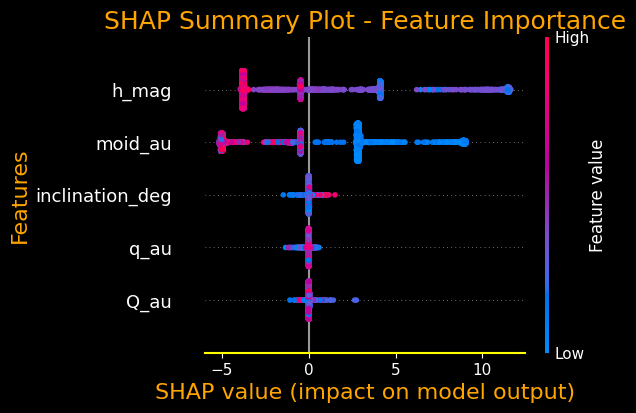

In [61]:
# Setting the dark background style to match the EDA space theme
plt.style.use('dark_background')

# Creating the SHAP explainer
explainer = shap.Explainer(large_model_lgb, X_train_large)

# Calculating SHAP values
shap_values = explainer(X_test_large)

# Summary plot
plt.figure(figsize=(8, 4))
shap.summary_plot(
    shap_values,
    X_test_large,
    show=False,
    plot_size=(6, 4),
    color_bar=True
)
plt.title('SHAP Summary Plot - Feature Importance', fontsize=18, color='orange')
plt.xlabel('SHAP value (impact on model output)', fontsize=16, color='orange')
plt.ylabel('Features', fontsize=16, color='orange')

# Customizing axes and ticks to match the EDA space theme
ax = plt.gca()
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()

**SHAP Analysis**

* **h_mag is Key:**  The absolute magnitude of an asteroid has the strongest influence on the model's classification.  Higher h_mag values (dimmer objects) push the model towards classifying an NEO as a PHA. This aligns with the fact that dimmer asteroids are inherently harder to observe and track, increasing the uncertainty about their trajectories and potential risk.

* **moid_au is Important:** The minimum orbit intersection distance is the second most crucial factor. Smaller moid_au values (closer approaches to Earth) significantly increase the likelihood of a PHA classification. This is intuitive – the closer an asteroid gets to Earth, the higher the potential risk.

* **Other Factors:** While very much less impactful than h_mag and moid_au, they still contirbute a little to the model's assessment.

**Connecting to Misclassification Patterns**

The SHAP analysis supports my analysis on the constantly misclassified objects. The model is clearly sensitive to these features, and its struggles with this specific group of asteroids which is more likely an inherent observational challenges:

* **Dim & Small:** These asteroids are difficult to detect and track due to their low reflectivity/small size.
* **Underrepresentation in Datasets:** This leads to a lack of sufficient data on these objects, which contributes to the model's inability to learn their characteristics and accurately assess their risk.

**The Bigger Picture**

This reflects a broader challenge in asteroid detection. The model's difficulty in classifying smaller, dimmer NEOs highlights a critical limitation in current asteroid detection: these faint objects are often missed by cuurent technology (ground-based telescopes). To address this, NASA is developing the Near-Earth Object Surveyor (NEO Surveyor) mission, a space-based infrared telescope set to launch in 2027.

"[NEO Surveyor] will be able to find the potentially hazardous asteroids that are the hardest to find, the ones that don't reflect a lot of visible light," said Amy Mainzer, survey director for NEO Surveyor at the University of Arizona in Tucson.

This advancement will provide more comprehensive data for future models, leading to improved NEO classification and risk assessment.

SOUCE: https://www.nasa.gov/missions/neo-surveyor/work-is-under-way-on-nasas-next-generation-asteroid-hunter/

# **Deployment With Streamlit**

In [86]:
import lightgbm as lgb
import joblib

# Saving the trained model using joblib
joblib.dump(large_model_lgb, 'large_model_lgb.pkl')

# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Move the model to folder
!mv large_model_lgb.pkl /content/drive/MyDrive/Colab\ Notebooks/

Mounted at /content/drive


In [91]:
# Create & save the Streamlit app code
streamlit_code = """
import streamlit as st
import joblib
import numpy as np

# Loading model
model_path = '/content/drive/MyDrive/Colab Notebooks/large_model_lgb.pkl'
model = joblib.load(model_path)

# Title of the app
st.title("Asteroid & Comet Hazardousness Classifier")

# User inputs prompter
st.write("Please enter the following features to classify the asteroid/comet:")

# The model input features (allow up to 5 decimal places)
h_mag = st.number_input("h_mag (Absolute Magnitude)", format="%.5f")
moid_au = st.number_input("moid_au (Minimum Orbit Intersection Distance in Astronomical Units)", format="%.5f")
q_au = st.number_input("q_au (Perihelion Distance in Astronomical Units)", format="%.5f")
Q_au = st.number_input("Q_au (Aphelion Distance in Astronomical Units)", format="%.5f")
inclination_deg = st.number_input("inclination_deg (Orbital Inclination in Degrees)", format="%.5f")

# Prediction button
if st.button("Classify"):
    # Prepping input for prediction
    features = np.array([[h_mag, moid_au, q_au, Q_au, inclination_deg]])

    # Making prediction
    prediction = model.predict(features)

    # Interpret prediction as pha 0 or 1
    if prediction[0] == 1:
        st.write("Prediction: The object is potentially hazardous (PHA = 1).")
    else:
        st.write("Prediction: The object is not potentially hazardous (PHA = 0).")
"""

# Saving code as 'app.py'
with open('app.py', 'w') as f:
    f.write(streamlit_code)

In [92]:
!pip install streamlit
!npm install -g localtunnel


changed 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [93]:
!curl https://loca.lt/mytunnelpassword

35.225.176.92

In [ ]:
# Run the Streamlit app and expose it to the public using Localtunnel
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.225.176.92:8501

your url is: https://chilly-aliens-speak.loca.lt
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
